In [1]:
import numpy as np
from astropy.table import Table, Column
from numpy import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy.coordinates as coords
import astropy.units as u

In [2]:
b1 = Table.read('EABin1CDGS.fits')
DLO1 = b1['DISTLO']
DHI1 = b1['DISTHI']
DIST1 = b1['DISTANCE']
RAD1 = b1['GAIA RADIUS']
RA1 = (b1['GAIA RA'])*u.deg
DEC1 = (b1['GAIA DEC'])*u.deg
AM1 = np.asarray(b1['ALPHA/M'])
ID = b1['ID - GOLD STANDARD']
b1.info

<Table length=28>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [3]:
rows = len(DIST1)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance1():
    for mymean, myclipa, myclipb in zip(DIST1, DLO1, DHI1):
        STD1 = myclipb-myclipa
        a = (myclipa - mymean)/STD1
        b = (myclipb - mymean)/STD1
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD1)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[27,4] != 0.0:
            print(new_distance_bin[27,4])
            break

In [4]:

create_new_distance1()

5590.88996121


In [5]:
print(new_distance_bin)

[[  6063.98434394   7761.30857992   5540.09999839   9779.66186811
    9888.9237366 ]
 [  6337.48939721   5412.92110145   7001.82558262   7403.4335513
    6283.62819805]
 [  9363.10791957   5434.41968535   8239.00117233   9517.74421584
    5834.54709261]
 [  7873.26065588   8340.63819093   5374.35897354   7689.00121626
   10794.89306732]
 [  9324.30637126   7742.06585653   9568.79754103  10096.15850614
    6259.54337348]
 [  8027.06148822   7493.48052143   5233.60587268   5627.83157339
    8596.71460366]
 [  8272.81804668   5442.0393708   10419.6468259    7747.69405617
    7482.73660901]
 [  8536.39265292  10541.14079526  10680.34271306   5539.50504237
    5653.21108373]
 [  7236.72261687  11265.00566823   8628.27604805   7955.34556874
    6639.30044217]
 [  6432.25081126   5495.5055506   10908.97313754  10335.94285886
   10540.60697622]
 [  9668.35822014   7757.56614273   7240.31255969   7523.65838977
    5789.55565769]
 [ 11240.18376226   9181.98373005   7950.84721297   9901.7975082
 

In [6]:
distance_bin = Table(new_distance_bin)
dist11 = (distance_bin['col0']/1000)*u.kpc
dist12 = (distance_bin['col1']/1000)*u.kpc
dist13 = (distance_bin['col2']/1000)*u.kpc
dist14 = (distance_bin['col3']/1000)*u.kpc
dist15 = (distance_bin['col4']/1000)*u.kpc
print(dist11)

[  6.06398434   6.3374894    9.36310792   7.87326066   9.32430637
   8.02706149   8.27281805   8.53639265   7.23672262   6.43225081
   9.66835822  11.24018376  10.19010134   5.49847483   7.26595321
   7.51525484   9.39576189   9.51795046   8.75452249   5.60759752
  11.39400831   7.79546499   8.80240487   7.58488401   7.30254172
  10.80047179   9.39555185  10.5812209 ] kpc


In [7]:
GC11 = coords.SkyCoord(RA1, DEC1, dist11)
GCGAL11 = GC11.transform_to(coords.Galactocentric)
GX11 = GCGAL11.x
GY11 = GCGAL11.y
GZ11 = GCGAL11.z
radius11 = ((GX11**2 + GY11**2 + GZ11**2)**0.5)
radius_cylindrical11 = ((GX11**2 + GY11**2)**0.5)/u.kpc
GC12 = coords.SkyCoord(RA1, DEC1, dist12)
GCGAL12 = GC12.transform_to(coords.Galactocentric)
GX12 = GCGAL12.x
GY12 = GCGAL12.y
GZ12 = GCGAL12.z
radius12 = ((GX12**2 + GY12**2 + GZ12**2)**0.5)
radius_cylindrical12 = ((GX12**2 + GY12**2)**0.5)/u.kpc
GC13 = coords.SkyCoord(RA1, DEC1, dist13)
GCGAL13 = GC13.transform_to(coords.Galactocentric)
GX13 = GCGAL13.x
GY13 = GCGAL13.y
GZ13 = GCGAL13.z
radius13 = ((GX13**2 + GY13**2 + GZ13**2)**0.5)
radius_cylindrical13 = ((GX13**2 + GY13**2)**0.5)/u.kpc
GC14 = coords.SkyCoord(RA1, DEC1, dist14)
GCGAL14 = GC14.transform_to(coords.Galactocentric)
GX14 = GCGAL14.x
GY14 = GCGAL14.y
GZ14 = GCGAL14.z
radius14 = ((GX14**2 + GY14**2 + GZ14**2)**0.5)
radius_cylindrical14 = ((GX14**2 + GY14**2)**0.5)/u.kpc
GC15 = coords.SkyCoord(RA1, DEC1, dist15)
GCGAL15 = GC15.transform_to(coords.Galactocentric)
GX15 = GCGAL15.x
GY15 = GCGAL15.y
GZ15 = GCGAL15.z
radius15 = ((GX15**2 + GY15**2 + GZ15**2)**0.5)
radius_cylindrical15 = ((GX15**2 + GY15**2)**0.5)/u.kpc

print(radius_cylindrical15)

[ 1.36315735  2.15972893  2.59130501  2.24521811  2.1668555   0.14201405
  0.96679726  2.77259897  1.78507688  2.04265808  2.61609102  1.3162536
  1.06276011  0.78694594  2.59002042  2.60808254  0.71616867  0.66733623
  2.31736003  1.73977322  0.36804039  2.39651673  0.99847485  1.90230668
  0.1820129   0.51881668  2.16687465  2.8976628 ]


In [8]:
radius_firsttry = radius_cylindrical11
radius_secondtry = radius_cylindrical12
radius_thirdtry = radius_cylindrical13
radius_fourthtry = radius_cylindrical14
radius_fifthtry = radius_cylindrical15
radiusxyz_firsttry = radius11
radiusxyz_secondtry = radius12
radiusxyz_thirdtry = radius13
radiusxyz_fourthtry = radius14
radiusxyz_fifthtry = radius15
alpha = AM1

In [11]:
radiusxyz_firsttry

<Quantity [ 2.71608171, 2.51491972, 2.13754288, 1.81602208, 2.06418254,
            1.6867511 , 1.68201067, 1.81188084, 1.85747574, 2.35861583,
            2.21399376, 3.54761516, 2.62664504, 2.97834356, 1.51412196,
            1.41138937, 1.61265215, 1.76511176, 1.21556929, 2.83316701,
            3.16014324, 0.55050552, 0.59466777, 0.86837691, 1.15160732,
            2.60588722, 1.66667634, 3.11435003] kpc>

In [12]:
b2 = Table.read('EABin2CDGS.fits')
DLO2 = b2['DISTLO']
DHI2 = b2['DISTHI']
DIST2 = b2['DISTANCE']
RAD2 = b2['GAIA RADIUS']
RA2 = (b2['GAIA RA'])*u.deg
DEC2 = b2['GAIA DEC']*u.deg
AM2 = np.asarray(b2['ALPHA/M'])
ID = b2['ID - GOLD STANDARD']
b2.info

<Table length=157>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [13]:
rows = len(DIST2)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance2():
    for mymean, myclipa, myclipb in zip(DIST2, DLO2, DHI2):
        STD2 = myclipb-myclipa
        a = (myclipa - mymean)/STD2
        b = (myclipb - mymean)/STD2
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD2)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[156,4] != 0.0:
            print(new_distance_bin[156,4])
            break

In [14]:
create_new_distance2()

5970.06969211


In [15]:
distance_bin = Table(new_distance_bin)
dist21 = (distance_bin['col0']/1000)*u.kpc
dist22 = (distance_bin['col1']/1000)*u.kpc
dist23 = (distance_bin['col2']/1000)*u.kpc
dist24 = (distance_bin['col3']/1000)*u.kpc
dist25 = (distance_bin['col4']/1000)*u.kpc
print(dist21)

[ 5.76326818  6.4590541   6.56700135  5.73777659  4.65707234  7.22674289
  6.57204023  4.76118964  6.93444938  4.81575711  7.10342473  4.70221517
  5.83712525  7.151017    5.66879905  5.78346933  6.01729661  6.52822173
  6.12211512  7.27882252  4.95911391  6.96568235  6.62869524  6.13972039
  6.32850028  5.88069541  5.93982525  6.42309428  5.0154402   5.95599826
  7.44247057  7.20423331  6.41303027  4.69990144  5.8882733   6.73828851
  5.37212766  6.72730211  5.98349357  5.22775837  7.0955399   5.25161009
  6.29774839  5.50269894  7.16647932  7.04131018  6.05176434  6.52305176
  5.84157347  6.47026564  5.6643324   5.85934641  6.68879322  5.26892421
  4.96564506  6.05409742  5.63296086  7.27874439  4.77817888  7.39509931
  6.03873043  6.98062499  6.755236    7.26210968  5.35416503  5.93393271
  6.3132347   4.83498665  5.21626414  5.80190866  6.50596451  6.35522997
  5.19048607  5.1173376   7.24442678  6.04624906  7.40080632  6.60456542
  5.12043913  6.81037563  6.16317174  7.39746547  6

In [16]:
GC21 = coords.SkyCoord(RA2, DEC2, dist21)
GCGAL21 = GC21.transform_to(coords.Galactocentric)
GX21 = GCGAL21.x
GY21 = GCGAL21.y
GZ21 = GCGAL21.z
radius21 = ((GX21**2 + GY21**2 + GZ21**2)**0.5)/u.kpc
radius_cylindrical21 = ((GX21**2 + GY21**2)**0.5)/u.kpc
GC22 = coords.SkyCoord(RA2, DEC2, dist22)
GCGAL22 = GC22.transform_to(coords.Galactocentric)
GX22 = GCGAL22.x
GY22 = GCGAL22.y
GZ22 = GCGAL22.z
radius22 = ((GX22**2 + GY22**2 + GZ22**2)**0.5)/u.kpc
radius_cylindrical22 = ((GX22**2 + GY22**2)**0.5)/u.kpc
GC23 = coords.SkyCoord(RA2, DEC2, dist23)
GCGAL23 = GC23.transform_to(coords.Galactocentric)
GX23 = GCGAL23.x
GY23 = GCGAL23.y
GZ23 = GCGAL23.z
radius23 = ((GX23**2 + GY23**2 + GZ23**2)**0.5)/u.kpc
radius_cylindrical23 = ((GX23**2 + GY23**2)**0.5)/u.kpc
GC24 = coords.SkyCoord(RA2, DEC2, dist24)
GCGAL24 = GC24.transform_to(coords.Galactocentric)
GX24 = GCGAL24.x
GY24 = GCGAL24.y
GZ24 = GCGAL24.z
radius24 = ((GX24**2 + GY24**2 + GZ24**2)**0.5)/u.kpc
radius_cylindrical24 = ((GX24**2 + GY24**2)**0.5)/u.kpc
GC25 = coords.SkyCoord(RA2, DEC2, dist25)
GCGAL25 = GC25.transform_to(coords.Galactocentric)
GX25 = GCGAL25.x
GY25 = GCGAL25.y
GZ25 = GCGAL25.z
radius25 = ((GX25**2 + GY25**2 + GZ25**2)**0.5)/u.kpc
radius_cylindrical25 = ((GX25**2 + GY25**2)**0.5)/u.kpc
print(radius_cylindrical25)

[ 2.31403941  3.46246788  2.56209117  3.12114078  2.40261042  3.03618159
  2.24414768  2.51538155  2.46957228  2.45312478  3.63528047  3.53055989
  3.81918825  3.64402181  3.2211365   2.97836708  3.9735356   2.97730774
  3.10282971  3.13047243  3.64696682  3.33582004  3.32822697  3.46507379
  3.14466227  3.06093584  3.01571577  3.1694063   2.81805445  3.05190275
  2.67631353  3.26727883  3.12618148  2.99367356  1.50642409  3.00293165
  2.19854855  1.64447795  3.41768281  2.89134559  1.63072602  3.35134431
  2.79751317  1.57567642  3.72102596  2.48755015  1.49547065  3.73219751
  2.6226113   1.59813853  1.75465541  1.70463397  2.42838202  2.02980851
  2.3132402   2.34299334  2.14323498  1.90056657  1.04038347  2.85432868
  1.2313541   2.77206804  1.2931807   2.3004238   3.20215719  2.45712482
  3.12916624  3.53422214  1.66222293  1.94749904  2.18063775  1.67756759
  1.46766564  3.05700785  3.57855493  2.57128375  0.96353077  1.3206
  3.12628694  1.64397264  3.1981113   2.8761242   1.053

In [17]:
radius_firsttry = np.append(radius_firsttry, radius_cylindrical21)
radius_secondtry = np.append(radius_secondtry, radius_cylindrical22)
radius_thirdtry = np.append(radius_thirdtry, radius_cylindrical23)
radius_fourthtry = np.append(radius_fourthtry, radius_cylindrical24)
radius_fifthtry = np.append(radius_fifthtry, radius_cylindrical25)
radiusxyz_firsttry = np.append(radiusxyz_firsttry, radius21)
radiusxyz_secondtry = np.append(radiusxyz_secondtry, radius22)
radiusxyz_thirdtry = np.append(radiusxyz_thirdtry, radius23)
radiusxyz_fourthtry = np.append(radiusxyz_fourthtry, radius24)
radiusxyz_fifthtry = np.append(radiusxyz_fifthtry, radius25)
xfirsttry = np.append(GX11, GX21)
xsecondtry = np.append(GX12, GX22)
xthirdtry = np.append(GX13, GX23)
xfourthtry = np.append(GX14, GX24)
xfifthtry = np.append(GX15, GX25)
yfirsttry = np.append(GY11, GY21)
ysecondtry = np.append(GY12, GY22)
ythirdtry = np.append(GY13, GY23)
yfourthtry = np.append(GY14, GY24)
yfifthtry = np.append(GY15, GY25)
zfirsttry = np.append(GZ11, GZ21)
zsecondtry = np.append(GZ12, GZ22)
zthirdtry = np.append(GZ13, GZ23)
zfourthtry = np.append(GZ14, GZ24)
zfifthtry = np.append(GZ15, GZ25)
alpha = np.append(alpha, AM2)

In [18]:
radiusxyz_thirdtry

<Quantity [ 3.12873735, 2.10188129, 1.74061742, 3.26898592, 2.21488268,
            3.34801628, 2.83818781, 3.11505123, 1.69513147, 3.21328355,
            1.8416101 , 1.70573572, 2.81279017, 1.31274962, 1.79715598,
            2.08705716, 1.14048755, 2.60853764, 2.76384289, 1.48080838,
            3.25237727, 0.37023663, 1.75774785, 1.55213272, 0.98493419,
            0.7076465 , 2.30164333, 1.96973599, 3.97490106, 3.35747668,
            3.9881315 , 3.42311695, 3.29248253, 3.45018131, 3.43822837,
            4.29761899, 3.44016997, 3.44711488, 4.10437723, 3.54394849,
            4.04578064, 4.26380032, 4.30957676, 4.38760424, 3.48326267,
            4.33391729, 4.30282556, 3.22245516, 4.16794732, 4.07502097,
            3.99790065, 4.02698932, 3.74287543, 3.61069612, 3.76101971,
            3.40371697, 3.97358678, 3.43436266, 4.03519512, 3.67261568,
            1.9395959 , 3.15397396, 2.96633576, 2.27334161, 2.77491919,
            2.50603012, 2.01606797, 2.17483959, 3.0990396 , 2.08

In [19]:
b3 = Table.read('EABin3CDGS.fits')
DLO3 = b3['DISTLO']
DHI3 = b3['DISTHI']
DIST3 = b3['DISTANCE']
RAD3 = b3['GAIA RADIUS']
RA3 = (b3['GAIA RA'])*u.deg
DEC3 = b3['GAIA DEC']*u.deg
AM3 = np.array(b3['ALPHA/M'])
ID3 = b3['ID - GOLD STANDARD']
b3.info

<Table length=1004>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [20]:
rows = len(DIST3)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance3():
    for mymean, myclipa, myclipb in zip(DIST3, DLO3, DHI3):
        STD3 = myclipb-myclipa
        a = (myclipa - mymean)/STD3
        b = (myclipb - mymean)/STD3
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD3)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[1003,4] != 0.0:
            print(new_distance_bin[1003,4])
            break

In [21]:
create_new_distance3()

7350.29099983


In [22]:
distance_bin = Table(new_distance_bin)
dist31 = (distance_bin['col0']/1000)*u.kpc
dist32 = (distance_bin['col1']/1000)*u.kpc
dist33 = (distance_bin['col2']/1000)*u.kpc
dist34 = (distance_bin['col3']/1000)*u.kpc
dist35 = (distance_bin['col4']/1000)*u.kpc
print(dist31)

[ 5.39987321  7.03831319  6.66216608 ...,  7.19130399  7.4990336
  7.34346601] kpc


In [23]:
GC31 = coords.SkyCoord(RA3, DEC3, dist31)
GCGAL31 = GC31.transform_to(coords.Galactocentric)
GX31 = GCGAL31.x
GY31 = GCGAL31.y
GZ31 = GCGAL31.z
radius31 = ((GX31**2 + GY31**2 + GZ31**2)**0.5)/u.kpc
radius_cylindrical31 = ((GX31**2 + GY31**2)**0.5)/u.kpc
GC32 = coords.SkyCoord(RA3, DEC3, dist32)
GCGAL32 = GC32.transform_to(coords.Galactocentric)
GX32 = GCGAL32.x
GY32 = GCGAL32.y
GZ32 = GCGAL32.z
radius32 = ((GX32**2 + GY32**2 + GZ32**2)**0.5)/u.kpc
radius_cylindrical32 = ((GX32**2 + GY32**2)**0.5)/u.kpc
GC33 = coords.SkyCoord(RA3, DEC3, dist33)
GCGAL33 = GC33.transform_to(coords.Galactocentric)
GX33 = GCGAL33.x
GY33 = GCGAL33.y
GZ33 = GCGAL33.z
radius33 = ((GX33**2 + GY33**2 + GZ33**2)**0.5)/u.kpc
radius_cylindrical33 = ((GX33**2 + GY33**2)**0.5)/u.kpc
GC34 = coords.SkyCoord(RA3, DEC3, dist34)
GCGAL34 = GC34.transform_to(coords.Galactocentric)
GX34 = GCGAL34.x
GY34 = GCGAL34.y
GZ34 = GCGAL34.z
radius34 = ((GX34**2 + GY34**2 + GZ34**2)**0.5)/u.kpc
radius_cylindrical34 = ((GX34**2 + GY34**2)**0.5)/u.kpc
GC35 = coords.SkyCoord(RA3, DEC3, dist35)
GCGAL35 = GC35.transform_to(coords.Galactocentric)
GX35 = GCGAL35.x
GY35 = GCGAL35.y
GZ35 = GCGAL35.z
radius35 = ((GX35**2 + GY35**2 + GZ35**2)**0.5)/u.kpc
radius_cylindrical35 = ((GX35**2 + GY35**2)**0.5)/u.kpc
print(radius_cylindrical34)

[ 4.61768148  3.54534315  4.52186014 ...,  4.75160025  4.66918344
  5.80354056]


In [24]:
radius_firsttry = np.append(radius_firsttry, radius_cylindrical31)
radius_secondtry = np.append(radius_secondtry, radius_cylindrical32)
radius_thirdtry = np.append(radius_thirdtry, radius_cylindrical33)
radius_fourthtry = np.append(radius_fourthtry, radius_cylindrical34)
radius_fifthtry = np.append(radius_fifthtry, radius_cylindrical35)
radiusxyz_firsttry = np.append(radiusxyz_firsttry, radius31)
radiusxyz_secondtry = np.append(radiusxyz_secondtry, radius32)
radiusxyz_thirdtry = np.append(radiusxyz_thirdtry, radius33)
radiusxyz_fourthtry = np.append(radiusxyz_fourthtry, radius34)
radiusxyz_fifthtry = np.append(radiusxyz_fifthtry, radius35)
xfirsttry = np.append(xfirsttry, GX31)
xsecondtry = np.append(xsecondtry, GX32)
xthirdtry = np.append(xthirdtry, GX33)
xfourthtry = np.append(xfourthtry, GX34)
xfifthtry = np.append(xfifthtry, GX35)
yfirsttry = np.append(yfirsttry, GY31)
ysecondtry = np.append(ysecondtry, GY32)
ythirdtry = np.append(ythirdtry, GY33)
yfourthtry = np.append(yfourthtry, GY34)
yfifthtry = np.append(yfifthtry, GY35)
zfirsttry = np.append(zfirsttry, GZ31)
zsecondtry = np.append(zsecondtry, GZ32)
zthirdtry = np.append(zthirdtry, GZ33)
zfourthtry = np.append(zfourthtry, GZ34)
zfifthtry = np.append(zfifthtry, GZ35)
alpha = np.append(alpha, AM3)

In [25]:
b4 = Table.read('EABin4CDGS.fits')
DLO4 = b4['DISTLO']
DHI4 = b4['DISTHI']
DIST4 = b4['DISTANCE']
RAD4 = b4['GAIA RADIUS']
RA4 = (b4['GAIA RA'])*u.deg
DEC4 = b4['GAIA DEC']*u.deg
AM4 = np.array(b4['ALPHA/M'])
ID4 = b4['ID - GOLD STANDARD']
b4.info

<Table length=4828>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [26]:
rows = len(DIST4)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance4():
    for mymean, myclipa, myclipb in zip(DIST4, DLO4, DHI4):
        STD4 = myclipb-myclipa
        a = (myclipa - mymean)/STD4
        b = (myclipb - mymean)/STD4
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD4)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[4827,4] != 0.0:
            print(new_distance_bin[4827,4])
            break

In [27]:
create_new_distance4()

1866.99261027


In [28]:
distance_bin = Table(new_distance_bin)
dist41 = (distance_bin['col0']/1000)*u.kpc
dist42 = (distance_bin['col1']/1000)*u.kpc
dist43 = (distance_bin['col2']/1000)*u.kpc
dist44 = (distance_bin['col3']/1000)*u.kpc
dist45 = (distance_bin['col4']/1000)*u.kpc
print(dist41)

[ 2.05906995  2.00412017  1.84341764 ...,  1.94178051  1.93243705
  1.87570735] kpc


In [29]:
GC41 = coords.SkyCoord(RA4, DEC4, dist41)
GCGAL41 = GC41.transform_to(coords.Galactocentric)
GX41 = GCGAL41.x
GY41 = GCGAL41.y
GZ41 = GCGAL41.z
radius41 = ((GX41**2 + GY41**2 + GZ41**2)**0.5)/u.kpc
radius_cylindrical41 = ((GX41**2 + GY41**2)**0.5)/u.kpc
GC42 = coords.SkyCoord(RA4, DEC4, dist42)
GCGAL42 = GC42.transform_to(coords.Galactocentric)
GX42 = GCGAL42.x
GY42 = GCGAL42.y
GZ42 = GCGAL42.z
radius42 = ((GX42**2 + GY42**2 + GZ42**2)**0.5)/u.kpc
radius_cylindrical42 = ((GX42**2 + GY42**2)**0.5)/u.kpc
GC43 = coords.SkyCoord(RA4, DEC4, dist43)
GCGAL43 = GC43.transform_to(coords.Galactocentric)
GX43 = GCGAL43.x
GY43 = GCGAL43.y
GZ43 = GCGAL43.z
radius43 = ((GX43**2 + GY43**2 + GZ43**2)**0.5)/u.kpc
radius_cylindrical43 = ((GX43**2 + GY43**2)**0.5)/u.kpc
GC44 = coords.SkyCoord(RA4, DEC4, dist44)
GCGAL44 = GC44.transform_to(coords.Galactocentric)
GX44 = GCGAL44.x
GY44 = GCGAL44.y
GZ44 = GCGAL44.z
radius44 = ((GX44**2 + GY44**2 + GZ44**2)**0.5)/u.kpc
radius_cylindrical44 = ((GX44**2 + GY44**2)**0.5)/u.kpc
GC45 = coords.SkyCoord(RA4, DEC4, dist45)
GCGAL45 = GC45.transform_to(coords.Galactocentric)
GX45 = GCGAL45.x
GY45 = GCGAL45.y
GZ45 = GCGAL45.z
radius45 = ((GX45**2 + GY45**2 + GZ45**2)**0.5)/u.kpc
radius_cylindrical45 = ((GX45**2 + GY45**2)**0.5)/u.kpc

In [30]:
radius_firsttry = np.append(radius_firsttry, radius_cylindrical41)
radius_secondtry = np.append(radius_secondtry, radius_cylindrical42)
radius_thirdtry = np.append(radius_thirdtry, radius_cylindrical43)
radius_fourthtry = np.append(radius_fourthtry, radius_cylindrical44)
radius_fifthtry = np.append(radius_fifthtry, radius_cylindrical45)
radiusxyz_firsttry = np.append(radiusxyz_firsttry, radius41)
radiusxyz_secondtry = np.append(radiusxyz_secondtry, radius42)
radiusxyz_thirdtry = np.append(radiusxyz_thirdtry, radius43)
radiusxyz_fourthtry = np.append(radiusxyz_fourthtry, radius44)
radiusxyz_fifthtry = np.append(radiusxyz_fifthtry, radius45)
xfirsttry = np.append(xfirsttry, GX41)
xsecondtry = np.append(xsecondtry, GX42)
xthirdtry = np.append(xthirdtry, GX43)
xfourthtry = np.append(xfourthtry, GX44)
xfifthtry = np.append(xfifthtry, GX45)
yfirsttry = np.append(yfirsttry, GY41)
ysecondtry = np.append(ysecondtry, GY42)
ythirdtry = np.append(ythirdtry, GY43)
yfourthtry = np.append(yfourthtry, GY44)
yfifthtry = np.append(yfifthtry, GY45)
zfirsttry = np.append(zfirsttry, GZ41)
zsecondtry = np.append(zsecondtry, GZ42)
zthirdtry = np.append(zthirdtry, GZ43)
zfourthtry = np.append(zfourthtry, GZ44)
zfifthtry = np.append(zfifthtry, GZ45)
alpha = np.append(alpha, AM4)



In [31]:
b5 = Table.read('EABin5CDGS.fits')
DLO5 = b5['DISTLO']
DHI5 = b5['DISTHI']
DIST5 = b5['DISTANCE']
RAD5 = b5['GAIA RADIUS']
RA5 = (b5['GAIA RA'])*u.deg
DEC5 = b5['GAIA DEC']*u.deg
AM5 = np.array(b5['ALPHA/M'])
ID5 = b5['ID - GOLD STANDARD']
b5.info

<Table length=15029>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [32]:
rows = len(DIST5)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance5():
    for mymean, myclipa, myclipb in zip(DIST5, DLO5, DHI5):
        STD5 = myclipb-myclipa
        a = (myclipa - mymean)/STD5
        b = (myclipb - mymean)/STD5
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD5)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[15028,4] != 0.0:
            print(new_distance_bin[15028,4])
            break

In [33]:
create_new_distance5()

2200.48881993


In [34]:
distance_bin = Table(new_distance_bin)
dist51 = (distance_bin['col0']/1000)*u.kpc
dist52 = (distance_bin['col1']/1000)*u.kpc
dist53 = (distance_bin['col2']/1000)*u.kpc
dist54 = (distance_bin['col3']/1000)*u.kpc
dist55 = (distance_bin['col4']/1000)*u.kpc
print(dist51)

[ 2.12921254  2.27080558  2.22612689 ...,  2.23993693  2.41376519
  2.52915989] kpc


In [35]:
GC51 = coords.SkyCoord(RA5, DEC5, dist51)
GCGAL51 = GC51.transform_to(coords.Galactocentric)
GX51 = GCGAL51.x
GY51 = GCGAL51.y
GZ51 = GCGAL51.z
radius51 = ((GX51**2 + GY51**2 + GZ51**2)**0.5)/u.kpc
radius_cylindrical51 = ((GX51**2 + GY51**2)**0.5)/u.kpc
GC52 = coords.SkyCoord(RA5, DEC5, dist52)
GCGAL52 = GC52.transform_to(coords.Galactocentric)
GX52 = GCGAL52.x
GY52 = GCGAL52.y
GZ52 = GCGAL52.z
radius52 = ((GX52**2 + GY52**2 + GZ52**2)**0.5)/u.kpc
radius_cylindrical52 = ((GX52**2 + GY52**2)**0.5)/u.kpc
GC53 = coords.SkyCoord(RA5, DEC5, dist53)
GCGAL53 = GC53.transform_to(coords.Galactocentric)
GX53 = GCGAL53.x
GY53 = GCGAL53.y
GZ53 = GCGAL53.z
radius53 = ((GX53**2 + GY53**2 + GZ53**2)**0.5)/u.kpc
radius_cylindrical53 = ((GX53**2 + GY53**2)**0.5)/u.kpc
GC54 = coords.SkyCoord(RA5, DEC5, dist54)
GCGAL54 = GC54.transform_to(coords.Galactocentric)
GX54 = GCGAL54.x
GY54 = GCGAL54.y
GZ54 = GCGAL54.z
radius54 = ((GX54**2 + GY54**2 + GZ54**2)**0.5)/u.kpc
radius_cylindrical54 = ((GX54**2 + GY54**2)**0.5)/u.kpc
GC55 = coords.SkyCoord(RA5, DEC5, dist55)
GCGAL55 = GC55.transform_to(coords.Galactocentric)
GX55 = GCGAL55.x
GY55 = GCGAL55.y
GZ55 = GCGAL55.z
radius55 = ((GX55**2 + GY55**2 + GZ55**2)**0.5)/u.kpc
radius_cylindrical55 = ((GX55**2 + GY55**2)**0.5)/u.kpc

In [36]:
radius_firsttry = np.append(radius_firsttry, radius_cylindrical51)
radius_secondtry = np.append(radius_secondtry, radius_cylindrical52)
radius_thirdtry = np.append(radius_thirdtry, radius_cylindrical53)
radius_fourthtry = np.append(radius_fourthtry, radius_cylindrical54)
radius_fifthtry = np.append(radiusxyz_fifthtry, radius_cylindrical55)
radiusxyz_firsttry = np.append(radiusxyz_firsttry, radius51)
radiusxyz_secondtry = np.append(radiusxyz_secondtry, radius52)
radiusxyz_thirdtry = np.append(radiusxyz_thirdtry, radius53)
radiusxyz_fourthtry = np.append(radiusxyz_fourthtry, radius54)
radiusxyz_fifthtry = np.append(radiusxyz_fifthtry, radius55)
xfirsttry = np.append(xfirsttry, GX51)
xsecondtry = np.append(xsecondtry, GX52)
xthirdtry = np.append(xthirdtry, GX53)
xfourthtry = np.append(xfourthtry, GX54)
xfifthtry = np.append(xfifthtry, GX55)
yfirsttry = np.append(yfirsttry, GY51)
ysecondtry = np.append(ysecondtry, GY52)
ythirdtry = np.append(ythirdtry, GY53)
yfourthtry = np.append(yfourthtry, GY54)
yfifthtry = np.append(yfifthtry, GY55)
zfirsttry = np.append(zfirsttry, GZ51)
zsecondtry = np.append(zsecondtry, GZ52)
zthirdtry = np.append(zthirdtry, GZ53)
zfourthtry = np.append(zfourthtry, GZ54)
zfifthtry = np.append(zfifthtry, GZ55)
alpha = np.append(alpha, AM5)

In [37]:
b6 = Table.read('EABin6CDGS.fits')
DLO6 = b6['DISTLO']
DHI6 = b6['DISTHI']
DIST6 = b6['DISTANCE']
RAD6 = b6['GAIA RADIUS']
RA6 = (b6['GAIA RA'])*u.deg
DEC6 = b6['GAIA DEC']*u.deg
AM6 = np.array(b6['ALPHA/M'])
ID6 = b6['ID - GOLD STANDARD']
b6.info

<Table length=15061>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [38]:
rows = len(DIST6)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance6():
    for mymean, myclipa, myclipb in zip(DIST6, DLO6, DHI6):
        STD6 = myclipb-myclipa
        a = (myclipa - mymean)/STD6
        b = (myclipb - mymean)/STD6
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD6)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[15060,4] != 0.0:
            print(new_distance_bin[15060,4])
            break

In [39]:
create_new_distance6()

4495.317881


In [40]:
distance_bin = Table(new_distance_bin)
dist61 = (distance_bin['col0']/1000)*u.kpc
dist62 = (distance_bin['col1']/1000)*u.kpc
dist63 = (distance_bin['col2']/1000)*u.kpc
dist64 = (distance_bin['col3']/1000)*u.kpc
dist65 = (distance_bin['col4']/1000)*u.kpc
print(dist61)

[ 5.64374769  5.11916334  4.63727316 ...,  4.65791302  4.71260311
  4.50852519] kpc


In [41]:
GC61 = coords.SkyCoord(RA6, DEC6, dist61)
GCGAL61 = GC61.transform_to(coords.Galactocentric)
GX61 = GCGAL61.x
GY61 = GCGAL61.y
GZ61 = GCGAL61.z
radius61 = ((GX61**2 + GY61**2 + GZ61**2)**0.5)/u.kpc
radius_cylindrical61 = ((GX61**2 + GY61**2)**0.5)/u.kpc
GC62 = coords.SkyCoord(RA6, DEC6, dist62)
GCGAL62 = GC62.transform_to(coords.Galactocentric)
GX62 = GCGAL62.x
GY62 = GCGAL62.y
GZ62 = GCGAL62.z
radius62 = ((GX62**2 + GY62**2 + GZ62**2)**0.5)/u.kpc
radius_cylindrical62 = ((GX62**2 + GY62**2)**0.5)/u.kpc
GC63 = coords.SkyCoord(RA6, DEC6, dist63)
GCGAL63 = GC63.transform_to(coords.Galactocentric)
GX63 = GCGAL63.x
GY63 = GCGAL63.y
GZ63 = GCGAL63.z
radius63 = ((GX63**2 + GY63**2 + GZ63**2)**0.5)/u.kpc
radius_cylindrical63 = ((GX63**2 + GY63**2)**0.5)/u.kpc
GC64 = coords.SkyCoord(RA6, DEC6, dist64)
GCGAL64 = GC64.transform_to(coords.Galactocentric)
GX64 = GCGAL64.x
GY64 = GCGAL64.y
GZ64 = GCGAL64.z
radius64 = ((GX64**2 + GY64**2 + GZ64**2)**0.5)/u.kpc
radius_cylindrical64 = ((GX64**2 + GY64**2)**0.5)/u.kpc
GC65 = coords.SkyCoord(RA6, DEC6, dist65)
GCGAL65 = GC65.transform_to(coords.Galactocentric)
GX65 = GCGAL65.x
GY65 = GCGAL65.y
GZ65 = GCGAL65.z
radius65 = ((GX65**2 + GY65**2 + GZ65**2)**0.5)/u.kpc
radius_cylindrical65 = ((GX65**2 + GY65**2)**0.5)/u.kpc

In [42]:

radius_firsttry = np.append(radius_firsttry, radius_cylindrical61)
radius_secondtry = np.append(radius_secondtry, radius_cylindrical62)
radius_thirdtry = np.append(radius_thirdtry, radius_cylindrical63)
radius_fourthtry = np.append(radius_fourthtry, radius_cylindrical64)
radius_fifthtry = np.append(radius_fifthtry, radius_cylindrical65)
radiusxyz_firsttry = np.append(radiusxyz_firsttry, radius61)
radiusxyz_secondtry = np.append(radiusxyz_secondtry, radius62)
radiusxyz_thirdtry = np.append(radiusxyz_thirdtry, radius63)
radiusxyz_fourthtry = np.append(radiusxyz_fourthtry, radius64)
radiusxyz_fifthtry = np.append(radiusxyz_fifthtry, radius65)
xfirsttry = np.append(xfirsttry, GX61)
xsecondtry = np.append(xsecondtry, GX62)
xthirdtry = np.append(xthirdtry, GX63)
xfourthtry = np.append(xfourthtry, GX64)
xfifthtry = np.append(xfifthtry, GX65)
yfirsttry = np.append(yfirsttry, GY61)
ysecondtry = np.append(ysecondtry, GY62)
ythirdtry = np.append(ythirdtry, GY63)
yfourthtry = np.append(yfourthtry, GY64)
yfifthtry = np.append(yfifthtry, GY65)
zfirsttry = np.append(zfirsttry, GZ61)
zsecondtry = np.append(zsecondtry, GZ62)
zthirdtry = np.append(zthirdtry, GZ63)
zfourthtry = np.append(zfourthtry, GZ64)
zfifthtry = np.append(zfifthtry, GZ65)
alpha = np.append(alpha, AM6)

In [43]:
b7 = Table.read('EABin7CDGS.fits')
DLO7 = b7['DISTLO']
DHI7 = b7['DISTHI']
DIST7 = b7['DISTANCE']
RAD7 = b7['GAIA RADIUS']
RA7 = (b7['GAIA RA'])*u.deg
DEC7 = b7['GAIA DEC']*u.deg
AM7 = np.array(b7['ALPHA/M'])
ID7 = b7['ID - GOLD STANDARD']
b7.info

<Table length=6086>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [44]:
rows = len(DIST7)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance7():
    for mymean, myclipa, myclipb in zip(DIST7, DLO7, DHI7):
        STD7 = myclipb-myclipa
        a = (myclipa - mymean)/STD7
        b = (myclipb - mymean)/STD7
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD7)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[6085,4] != 0.0:
            print(new_distance_bin[6085,4])
            break

In [45]:
create_new_distance7()

6775.59551935


In [46]:
distance_bin = Table(new_distance_bin)
dist71 = (distance_bin['col0']/1000)*u.kpc
dist72 = (distance_bin['col1']/1000)*u.kpc
dist73 = (distance_bin['col2']/1000)*u.kpc
dist74 = (distance_bin['col3']/1000)*u.kpc
dist75 = (distance_bin['col4']/1000)*u.kpc
print(dist71)

[ 6.17597617  8.97038925  9.20141005 ...,  7.22607128  8.68137446
  7.35921545] kpc


In [47]:
GC71 = coords.SkyCoord(RA7, DEC7, dist71)
GCGAL71 = GC71.transform_to(coords.Galactocentric)
GX71 = GCGAL71.x
GY71 = GCGAL71.y
GZ71 = GCGAL71.z
radius71 = ((GX71**2 + GY71**2 + GZ71**2)**0.5)/u.kpc
radius_cylindrical71 = ((GX71**2 + GY71**2)**0.5)/u.kpc
GC72 = coords.SkyCoord(RA7, DEC7, dist72)
GCGAL72 = GC72.transform_to(coords.Galactocentric)
GX72 = GCGAL72.x
GY72 = GCGAL72.y
GZ72 = GCGAL72.z
radius72 = ((GX72**2 + GY72**2 + GZ72**2)**0.5)/u.kpc
radius_cylindrical72 = ((GX72**2 + GY72**2)**0.5)/u.kpc
GC73 = coords.SkyCoord(RA7, DEC7, dist73)
GCGAL73 = GC73.transform_to(coords.Galactocentric)
GX73 = GCGAL73.x
GY73 = GCGAL73.y
GZ73 = GCGAL73.z
radius73 = ((GX73**2 + GY73**2 + GZ73**2)**0.5)/u.kpc
radius_cylindrical73 = ((GX73**2 + GY73**2)**0.5)/u.kpc
GC74 = coords.SkyCoord(RA7, DEC7, dist74)
GCGAL74 = GC74.transform_to(coords.Galactocentric)
GX74 = GCGAL74.x
GY74 = GCGAL74.y
GZ74 = GCGAL74.z
radius74 = ((GX74**2 + GY74**2 + GZ74**2)**0.5)/u.kpc
radius_cylindrical74 = ((GX74**2 + GY74**2)**0.5)/u.kpc
GC75 = coords.SkyCoord(RA7, DEC7, dist75)
GCGAL75 = GC75.transform_to(coords.Galactocentric)
GX75 = GCGAL75.x
GY75 = GCGAL75.y
GZ75 = GCGAL75.z
radius75 = ((GX75**2 + GY75**2 + GZ75**2)**0.5)/u.kpc
radius_cylindrical75 = ((GX75**2 + GY75**2)**0.5)/u.kpc

In [48]:

radius_firsttry = np.append(radius_firsttry, radius_cylindrical71)
radius_secondtry = np.append(radius_secondtry, radius_cylindrical72)
radius_thirdtry = np.append(radius_thirdtry, radius_cylindrical73)
radius_fourthtry = np.append(radius_fourthtry, radius_cylindrical74)
radius_fifthtry = np.append(radius_fifthtry, radius_cylindrical75)
radiusxyz_firsttry = np.append(radiusxyz_firsttry, radius71)
radiusxyz_secondtry = np.append(radiusxyz_secondtry, radius72)
radiusxyz_thirdtry = np.append(radiusxyz_thirdtry, radius73)
radiusxyz_fourthtry = np.append(radiusxyz_fourthtry, radius74)
radiusxyz_fifthtry = np.append(radiusxyz_fifthtry, radius75)
xfirsttry = np.append(xfirsttry, GX71)
xsecondtry = np.append(xsecondtry, GX72)
xthirdtry = np.append(xthirdtry, GX73)
xfourthtry = np.append(xfourthtry, GX74)
xfifthtry = np.append(xfifthtry, GX75)
yfirsttry = np.append(yfirsttry, GY71)
ysecondtry = np.append(ysecondtry, GY72)
ythirdtry = np.append(ythirdtry, GY73)
yfourthtry = np.append(yfourthtry, GY74)
yfifthtry = np.append(yfifthtry, GY75)
zfirsttry = np.append(zfirsttry, GZ71)
zsecondtry = np.append(zsecondtry, GZ72)
zthirdtry = np.append(zthirdtry, GZ73)
zfourthtry = np.append(zfourthtry, GZ74)
zfifthtry = np.append(zfifthtry, GZ75)
alpha = np.append(alpha, AM7)

In [49]:
b8 = Table.read('EABin8CDGS.fits')
DLO8 = b8['DISTLO']
DHI8 = b8['DISTHI']
DIST8 = b8['DISTANCE']
RAD8 = b8['GAIA RADIUS']
RA8 = (b8['GAIA RA'])*u.deg
DEC8 = b8['GAIA DEC']*u.deg
AM8 = np.array(b8['ALPHA/M'])
ID8 = b8['ID - GOLD STANDARD']
b8.info

<Table length=777>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [50]:
rows = len(DIST8)
new_distance_bin = np.zeros(shape=(rows,5))
def create_new_distance8():
    for mymean, myclipa, myclipb in zip(DIST8, DLO8, DHI8):
        STD8 = myclipb-myclipa
        a = (myclipa - mymean)/STD8
        b = (myclipb - mymean)/STD8
        mean, var, skew, kurt = stats.truncnorm.stats(a, b, moments='mvsk')
        for i in range(rows):
            for j in range(0,5):            
                X = stats.truncnorm(a, b, loc=mymean, scale=STD8)
                nval = 1000
                new_dist = X.rvs(nval)[random.randint(nval)]
                new_distance_bin[i,j] = new_dist
        if new_distance_bin[776,4] != 0.0:
            print(new_distance_bin[776,4])
            break

In [51]:
create_new_distance8()

8220.67307241


In [52]:
distance_bin = Table(new_distance_bin)
dist81 = (distance_bin['col0']/1000)*u.kpc
dist82 = (distance_bin['col1']/1000)*u.kpc
dist83 = (distance_bin['col2']/1000)*u.kpc
dist84 = (distance_bin['col3']/1000)*u.kpc
dist85 = (distance_bin['col4']/1000)*u.kpc
print(dist81)

[  7.52169766   8.53369626  10.43748653   9.55220945   9.3748295
  10.19396254  10.43080816  11.02573114   9.03590671   8.21168792
  10.65871433   8.26681319  10.53963552   9.41467894  11.18739343
   7.63422505   7.91376999   9.67490601   8.11168618   9.45295349
   7.21308513   8.87985218   7.77161894  10.36634304   7.94617497
   8.38956309  10.32122076   9.27026778   7.4560374    8.66494771
  10.64450401  10.81089556  11.05006877   9.04598693   9.42776805
   9.24754236  11.17509163   8.85054584   8.62719447   7.41107229
   8.1342006    7.3432292    8.31961621   8.39579434  10.02373312
  10.08080177   7.17155165   9.24361915   7.13337833  10.88079645
   7.90518555   7.07074187   8.71459879   7.40147625   7.29111704
  11.00944385  11.19492974  10.45109183   8.01869034  10.20268953
   9.38835856   8.35471404  10.34988659   9.62764275  10.65759212
   8.73977491  10.71908025  10.52261954  10.22862954   7.82889795
   9.38905286  10.61394697  10.29409825   7.0250588    8.35088593
   9.339390

In [53]:
GC81 = coords.SkyCoord(RA8, DEC8, dist81)
GCGAL81 = GC81.transform_to(coords.Galactocentric)
GX81 = GCGAL81.x
GY81 = GCGAL81.y
GZ81 = GCGAL81.z
radius81 = ((GX81**2 + GY81**2 + GZ81**2)**0.5)/u.kpc
radius_cylindrical81 = ((GX81**2 + GY81**2)**0.5)/u.kpc
GC82 = coords.SkyCoord(RA8, DEC8, dist82)
GCGAL82 = GC82.transform_to(coords.Galactocentric)
GX82 = GCGAL82.x
GY82 = GCGAL82.y
GZ82 = GCGAL82.z
radius82 = ((GX82**2 + GY82**2 + GZ82**2)**0.5)/u.kpc
radius_cylindrical82 = ((GX82**2 + GY82**2)**0.5)/u.kpc
GC83 = coords.SkyCoord(RA8, DEC8, dist83)
GCGAL83 = GC83.transform_to(coords.Galactocentric)
GX83 = GCGAL83.x
GY83 = GCGAL83.y
GZ83 = GCGAL83.z
radius83 = ((GX83**2 + GY83**2 + GZ83**2)**0.5)/u.kpc
radius_cylindrical83 = ((GX83**2 + GY83**2)**0.5)/u.kpc
GC84 = coords.SkyCoord(RA8, DEC8, dist84)
GCGAL84 = GC84.transform_to(coords.Galactocentric)
GX84 = GCGAL84.x
GY84 = GCGAL84.y
GZ84 = GCGAL84.z
radius84 = ((GX84**2 + GY84**2 + GZ84**2)**0.5)/u.kpc
radius_cylindrical84 = ((GX84**2 + GY84**2)**0.5)/u.kpc
GC85 = coords.SkyCoord(RA8, DEC8, dist85)
GCGAL85 = GC85.transform_to(coords.Galactocentric)
GX85 = GCGAL85.x
GY85 = GCGAL85.y
GZ85 = GCGAL85.z
radius85 = ((GX85**2 + GY85**2 + GZ85**2)**0.5)/u.kpc
radius_cylindrical85 = ((GX85**2 + GY85**2)**0.5)/u.kpc

In [54]:

radius_firsttry = np.append(radius_firsttry, radius_cylindrical81)
radius_secondtry = np.append(radius_secondtry, radius_cylindrical82)
radius_thirdtry = np.append(radius_thirdtry, radius_cylindrical83)
radius_fourthtry = np.append(radius_fourthtry, radius_cylindrical84)
radius_fifthtry = np.append(radius_fifthtry, radius_cylindrical85)
radiusxyz_firsttry = np.append(radiusxyz_firsttry, radius81)
radiusxyz_secondtry = np.append(radiusxyz_secondtry, radius82)
radiusxyz_thirdtry = np.append(radiusxyz_thirdtry, radius83)
radiusxyz_fourthtry = np.append(radiusxyz_fourthtry, radius84)
radiusxyz_fifthtry = np.append(radiusxyz_fifthtry, radius85)
xfirsttry = np.append(xfirsttry, GX81)
xsecondtry = np.append(xsecondtry, GX82)
xthirdtry = np.append(xthirdtry, GX83)
xfourthtry = np.append(xfourthtry, GX84)
xfifthtry = np.append(xfifthtry, GX85)
yfirsttry = np.append(yfirsttry, GY81)
ysecondtry = np.append(ysecondtry, GY82)
ythirdtry = np.append(ythirdtry, GY83)
yfourthtry = np.append(yfourthtry, GY84)
yfifthtry = np.append(yfifthtry, GY85)
zfirsttry = np.append(zfirsttry, GZ81)
zsecondtry = np.append(zsecondtry, GZ82)
zthirdtry = np.append(zthirdtry, GZ83)
zfourthtry = np.append(zfourthtry, GZ84)
zfifthtry = np.append(zfifthtry, GZ85)
alpha = np.append(alpha, AM8)

In [139]:
bO = Table.read('EAFullCDGS.fits')
origx = bO['GAIA X']/1000
origy = bO['GAIA Y']/1000
origz = bO['GAIA Z']/1000
radius_cylindrical_orig = ((origx**2 + origy**2)**0.5)
radiusxyz_orig = bO['GAIA RADIUS']/1000
origAM = bO['ALPHA/M']
bO.info

<Table length=43028>
       name         dtype 
------------------ -------
ID - GOLD STANDARD   str18
     APOGEE RADIUS float64
          APOGEE X float64
          APOGEE Y float64
          APOGEE Z float64
       GAIA RADIUS float64
            GAIA X float64
            GAIA Y float64
            GAIA Z float64
           GAIA RA float64
          GAIA DEC float64
          DISTANCE float64
            DISTLO float64
            DISTHI float64
           DISTLEN float64
           ALPHA/M float64
       ALPHA ERROR float64
              FE/H float64
        FE/H ERROR float64
             LOG G float64
       LOG G ERROR float64
       TEMPERATURE float64
        TEMP ERROR float64

In [140]:
orig = [origAM, radius_cylindrical_orig, radiusxyz_orig, origx, origy, origz]
firsttry = [alpha, radius_firsttry, radiusxyz_firsttry, xfirsttry, yfirsttry, zfirsttry]
secondtry = [alpha, radius_secondtry, radiusxyz_secondtry, xsecondtry, ysecondtry, zsecondtry]
thirdtry = [alpha, radius_thirdtry, radiusxyz_thirdtry, xthirdtry, ythirdtry, zthirdtry]
fourthtry = [alpha, radius_fourthtry, radiusxyz_fourthtry, xfourthtry, yfourthtry, zfourthtry]
fifthtry = [alpha, radius_fifthtry, radiusxyz_fifthtry, xfifthtry, yfifthtry, zfifthtry]
tO = Table(orig, names=['Alpha', 'CylRadius', 'XYZRadius', 'X', 'Y', 'Z'])
t1 = Table(firsttry, names=['Alpha', 'CylRadius', 'XYZRadius', 'X', 'Y', 'Z'])
t2 = Table(secondtry, names=['Alpha', 'CylRadius', 'XYZRadius', 'X', 'Y', 'Z'])
t3 = Table(thirdtry, names=['Alpha', 'CylRadius', 'XYZRadius', 'X', 'Y', 'Z'])
t4 = Table(fourthtry, names=['Alpha', 'CylRadius', 'XYZRadius', 'X', 'Y', 'Z'])
t5 = Table(fifthtry, names=['Alpha', 'CylRadius', 'XYZRadius', 'X', 'Y', 'Z'])
orig_AM = tO['Alpha']
orig_CR = tO['CylRadius']
orig_R = tO['XYZRadius']
orig_Z = tO['Z']
first_AM = t1['Alpha']
first_CR = t1['CylRadius']
first_R = t1['XYZRadius']
first_Z = t1['Z']
second_AM = t2['Alpha']
second_CR = t2['CylRadius']
second_R = t2['XYZRadius']
second_Z = t2['Z']
third_AM = t3['Alpha']
third_CR = t3['CylRadius']
third_R = t3['XYZRadius']
third_Z = t3['Z']
fourth_AM = t4['Alpha']
fourth_CR = t4['CylRadius']
fourth_R = t4['XYZRadius']
fourth_Z = t4['Z']
fifth_AM = t5['Alpha']
fifth_CR = t5['CylRadius']
fifth_R = t5['XYZRadius']
fifth_Z = t5['Z']

In [57]:
xval = np.arange(-1, 1, 0.05)
m = -0.05
c = 0.08
yval = m*xval + c
r = [ 2.,4.,6.,8.,10.,12.,14.,16.]

In [141]:
orig_R

11.3402159031
10.9425005371
13.5220289167
9.57433364139
8.68966928252
10.2260314237
10.9857950102
11.9145117499
9.72773154058
10.4235689259
11.1518923916


In [142]:
orig_CR

11.331452202
10.9424625564
13.5214298979
9.57425522506
8.68958390958
10.225835117
10.9857898699
11.8864092006
9.72722691371
10.4169403817
11.144499541


In [143]:
tOc1 = np.logical_and(orig_CR > 0., orig_CR < 2.)
t1c1 = np.logical_and(first_CR > 0., first_CR < 2.)
t2c1 = np.logical_and(second_CR > 0., second_CR < 2.)
t3c1 = np.logical_and(third_CR > 0., third_CR < 2.)
t4c1 = np.logical_and(fourth_CR > 0., fourth_CR < 2.)
t5c1 = np.logical_and(fifth_CR > 0., fifth_CR < 2.)
sOc1 = np.logical_and(orig_R > 0., orig_R < 2.)
s1c1 = np.logical_and(first_R > 0., first_R < 2.)
s2c1 = np.logical_and(second_R > 0., second_R < 2.)
s3c1 = np.logical_and(third_R > 0., third_R < 2.)
s4c1 = np.logical_and(fourth_R > 0., fourth_R < 2.)
s5c1 = np.logical_and(fifth_R > 0., fifth_R < 2.)
TOA1 = orig_AM[tOc1]
TOR1 = orig_CR[tOc1]
T1A1 = first_AM[t1c1]
T1R1 = first_CR[t1c1]
T2A1 = second_AM[t2c1]
T2R1 = second_CR[t2c1]
T3A1 = third_AM[t3c1]
T3R1 = third_CR[t3c1]
T4A1 = fourth_AM[t4c1]
T4R1 = fourth_CR[t4c1]
T5A1 = fifth_AM[t5c1]
T5R1 = fifth_CR[t5c1]
SOA1 = orig_AM[sOc1]
SOR1 = orig_R[sOc1]
SOZ1 = orig_Z[sOc1]
S1A1 = first_AM[s1c1]
S1R1 = first_R[s1c1]
S1Z1 = first_Z[s1c1]
S2A1 = second_AM[s2c1]
S2R1 = second_R[s2c1]
S2Z1 = second_Z[s2c1]
S3A1 = third_AM[s3c1]
S3R1 = third_R[s3c1]
S3Z1 = third_Z[s3c1]
S4A1 = fourth_AM[s4c1]
S4R1 = fourth_R[s4c1]
S4Z1 = fourth_Z[s4c1]
S5A1 = fifth_AM[s5c1]
S5R1 = fifth_R[s5c1]
S5Z1 = fifth_Z[s5c1]
tOc2 = np.logical_and(orig_CR > 2., orig_CR < 4.)
t1c2 = np.logical_and(first_CR > 2., first_CR < 4.)
t2c2 = np.logical_and(second_CR > 2., second_CR < 4.)
t3c2 = np.logical_and(third_CR > 2., third_CR < 4.)
t4c2 = np.logical_and(fourth_CR > 2., fourth_CR < 4.)
t5c2 = np.logical_and(fifth_CR > 2., fifth_CR < 4.)
sOc2 = np.logical_and(orig_R > 2., orig_R < 4.)
s1c2 = np.logical_and(first_R > 2., first_R < 4.)
s2c2 = np.logical_and(second_R > 2., second_R < 4.)
s3c2 = np.logical_and(third_R > 2., third_R < 4.)
s4c2 = np.logical_and(fourth_R > 2., fourth_R < 4.)
s5c2 = np.logical_and(fifth_R > 2., fifth_R < 4.)
TOA2 = orig_AM[tOc2]
TOR2 = orig_CR[tOc2]
T1A2 = first_AM[t1c2]
T1R2 = first_CR[t1c2]
T2A2 = second_AM[t2c2]
T2R2 = second_CR[t2c2]
T3A2 = third_AM[t3c2]
T3R2 = third_CR[t3c2]
T4A2 = fourth_AM[t4c2]
T4R2 = fourth_CR[t4c2]
T5A2 = fifth_AM[t5c2]
T5R2 = fifth_CR[t5c2]
SOA2 = orig_AM[sOc2]
SOR2 = orig_R[sOc2]
SOZ2 = orig_Z[sOc2]
S1A2 = first_AM[s1c2]
S1R2 = first_R[s1c2]
S1Z2 = first_Z[s1c2]
S2A2 = second_AM[s2c2]
S2R2 = second_R[s2c2]
S2Z2 = second_Z[s2c2]
S3A2 = third_AM[s3c2]
S3R2 = third_R[s3c2]
S3Z2 = third_Z[s3c2]
S4A2 = fourth_AM[s4c2]
S4R2 = fourth_R[s4c2]
S4Z2 = fourth_Z[s4c2]
S5A2 = fifth_AM[s5c2]
S5R2 = fifth_R[s5c2]
S5Z2 = fifth_Z[s5c2]
tOc3 = np.logical_and(orig_CR > 4., orig_CR < 6.)
t1c3 = np.logical_and(first_CR > 4., first_CR < 6.)
t2c3 = np.logical_and(second_CR > 4., second_CR < 6.)
t3c3 = np.logical_and(third_CR > 4., third_CR < 6.)
t4c3 = np.logical_and(fourth_CR > 4., fourth_CR < 6.)
t5c3 = np.logical_and(fifth_CR > 4., fifth_CR < 6.)
sOc3 = np.logical_and(orig_R > 4., orig_R < 6.)
s1c3 = np.logical_and(first_R > 4., first_R < 6.)
s2c3 = np.logical_and(second_R > 4., second_R < 6.)
s3c3 = np.logical_and(third_R > 4., third_R < 6.)
s4c3 = np.logical_and(fourth_R > 4., fourth_R < 6.)
s5c3 = np.logical_and(fifth_R > 4., fifth_R < 6.)
TOA3 = orig_AM[tOc3]
TOR3 = orig_CR[tOc3]
T1A3 = first_AM[t1c3]
T1R3 = first_CR[t1c3]
T2A3 = second_AM[t2c3]
T2R3 = second_CR[t2c3]
T3A3 = third_AM[t3c3]
T3R3 = third_CR[t3c3]
T4A3 = fourth_AM[t4c3]
T4R3 = fourth_CR[t4c3]
T5A3 = fifth_AM[t5c3]
T5R3 = fifth_CR[t5c3]
SOA3 = orig_AM[sOc3]
SOR3 = orig_R[sOc3]
SOZ3 = orig_Z[sOc3]
S1A3 = first_AM[s1c3]
S1R3 = first_R[s1c3]
S1Z3 = first_Z[s1c3]
S2A3 = second_AM[s2c3]
S2R3 = second_R[s2c3]
S2Z3 = second_Z[s2c3]
S3A3 = third_AM[s3c3]
S3R3 = third_R[s3c3]
S3Z3 = third_Z[s3c3]
S4A3 = fourth_AM[s4c3]
S4R3 = fourth_R[s4c3]
S4Z3 = fourth_Z[s4c3]
S5A3 = fifth_AM[s5c3]
S5R3 = fifth_R[s5c3]
S5Z3 = fifth_Z[s5c3]
tOc4 = np.logical_and(orig_CR > 6., orig_CR < 8.)
t1c4 = np.logical_and(first_CR > 6., first_CR < 8.)
t2c4 = np.logical_and(second_CR > 6., second_CR < 8.)
t3c4 = np.logical_and(third_CR > 6., third_CR < 8.)
t4c4 = np.logical_and(fourth_CR > 6., fourth_CR < 8.)
t5c4 = np.logical_and(fifth_CR > 6., fifth_CR < 8.)
sOc4 = np.logical_and(orig_R > 6., orig_R < 8.)
s1c4 = np.logical_and(first_R > 6., first_R < 8.)
s2c4 = np.logical_and(second_R > 6., second_R < 8.)
s3c4 = np.logical_and(third_R > 6., third_R < 8.)
s4c4 = np.logical_and(fourth_R > 6., fourth_R < 8.)
s5c4 = np.logical_and(fifth_R > 6., fifth_R < 8.)
TOA4 = orig_AM[tOc4]
TOR4 = orig_CR[tOc4]
T1A4 = first_AM[t1c4]
T1R4 = first_CR[t1c4]
T2A4 = second_AM[t2c4]
T2R4 = second_CR[t2c4]
T3A4 = third_AM[t3c4]
T3R4 = third_CR[t3c4]
T4A4 = fourth_AM[t4c4]
T4R4 = fourth_CR[t4c4]
T5A4 = fifth_AM[t5c4]
T5R4 = fifth_CR[t5c4]
SOA4 = orig_AM[sOc4]
SOR4 = orig_R[sOc4]
SOZ4 = orig_Z[sOc4]
S1A4 = first_AM[s1c4]
S1R4 = first_R[s1c4]
S1Z4 = first_Z[s1c4]
S2A4 = second_AM[s2c4]
S2R4 = second_R[s2c4]
S2Z4 = second_Z[s2c4]
S3A4 = third_AM[s3c4]
S3R4 = third_R[s3c4]
S3Z4 = third_Z[s3c4]
S4A4 = fourth_AM[s4c4]
S4R4 = fourth_R[s4c4]
S4Z4 = fourth_Z[s4c4]
S5A4 = fifth_AM[s5c4]
S5R4 = fifth_R[s5c4]
S5Z4 = fifth_Z[s5c4]
tOc5 = np.logical_and(orig_CR > 8., orig_CR < 10.)
t1c5 = np.logical_and(first_CR > 8., first_CR < 10.)
t2c5 = np.logical_and(second_CR > 8., second_CR < 10.)
t3c5 = np.logical_and(third_CR > 8., third_CR < 10.)
t4c5 = np.logical_and(fourth_CR > 8., fourth_CR < 10.)
t5c5 = np.logical_and(fifth_CR > 8., fifth_CR < 10.)
sOc5 = np.logical_and(orig_R > 8., orig_R < 10.)
s1c5 = np.logical_and(first_R > 8., first_R < 10.)
s2c5 = np.logical_and(second_R > 8., second_R < 10.)
s3c5 = np.logical_and(third_R > 8., third_R < 10.)
s4c5 = np.logical_and(fourth_R > 8., fourth_R < 10.)
s5c5 = np.logical_and(fifth_R > 8., fifth_R < 10.)
TOA5 = orig_AM[tOc5]
TOR5 = orig_R[tOc5]
T1A5 = first_AM[t1c5]
T1R5 = first_R[t1c5]
T2A5 = second_AM[t2c5]
T2R5 = second_R[t2c5]
T3A5 = third_AM[t3c5]
T3R5 = third_R[t3c5]
T4A5 = fourth_AM[t4c5]
T4R5 = fourth_R[t4c5]
T5A5 = fifth_AM[t5c5]
T5R5 = fifth_R[t5c5]
SOA5 = orig_AM[sOc5]
SOR5 = orig_R[sOc5]
SOZ5 = orig_Z[sOc5]
S1A5 = first_AM[s1c5]
S1R5 = first_R[s1c5]
S1Z5 = first_Z[s1c5]
S2A5 = second_AM[s2c5]
S2R5 = second_R[s2c5]
S2Z5 = second_Z[s2c5]
S3A5 = third_AM[s3c5]
S3R5 = third_R[s3c5]
S3Z5 = third_Z[s3c5]
S4A5 = fourth_AM[s4c5]
S4R5 = fourth_R[s4c5]
S4Z5 = fourth_Z[s4c5]
S5A5 = fifth_AM[s5c5]
S5R5 = fifth_R[s5c5]
S5Z5 = fifth_Z[s5c5]
tOc6 = np.logical_and(orig_CR > 10., orig_CR < 12.)
t1c6 = np.logical_and(first_CR > 10., first_CR < 12.)
t2c6 = np.logical_and(second_CR > 10., second_CR < 12.)
t3c6 = np.logical_and(third_CR > 10., third_CR < 12.)
t4c6 = np.logical_and(fourth_CR > 10., fourth_CR < 12.)
t5c6 = np.logical_and(fifth_CR > 10., fifth_CR < 12.)
sOc6 = np.logical_and(orig_R > 10., orig_R < 12.)
s1c6 = np.logical_and(first_R > 10., first_R < 12.)
s2c6 = np.logical_and(second_R > 10., second_R < 12.)
s3c6 = np.logical_and(third_R > 10., third_R < 12.)
s4c6 = np.logical_and(fourth_R > 10., fourth_R < 12.)
s5c6 = np.logical_and(fifth_R > 10., fifth_R < 12.)
TOA6 = orig_AM[tOc6]
TOR6 = orig_CR[tOc6]
T1A6 = first_AM[t1c6]
T1R6 = first_CR[t1c6]
T2A6 = second_AM[t2c6]
T2R6 = second_CR[t2c6]
T3A6 = third_AM[t3c6]
T3R6 = third_CR[t3c6]
T4A6 = fourth_AM[t4c6]
T4R6 = fourth_CR[t4c6]
T5A6 = fifth_AM[t5c6]
T5R6 = fifth_CR[t5c6]
SOA6 = orig_AM[sOc6]
SOR6 = orig_R[sOc6]
SOZ6 = orig_Z[sOc6]
S1A6 = first_AM[s1c6]
S1R6 = first_R[s1c6]
S1Z6 = first_Z[s1c6]
S2A6 = second_AM[s2c6]
S2R6 = second_R[s2c6]
S2Z6 = second_Z[s2c6]
S3A6 = third_AM[s3c6]
S3R6 = third_R[s3c6]
S3Z6 = third_Z[s3c6]
S4A6 = fourth_AM[s4c6]
S4R6 = fourth_R[s4c6]
S4Z6 = fourth_Z[s4c6]
S5A6 = fifth_AM[s5c6]
S5R6 = fifth_R[s5c6]
S5Z6 = fifth_Z[s5c6]
tOc7 = np.logical_and(orig_CR > 12., orig_CR < 14.)
t1c7 = np.logical_and(first_CR > 12., first_CR < 14.)
t2c7 = np.logical_and(second_CR > 12., second_CR < 14.)
t3c7 = np.logical_and(third_CR > 12., third_CR < 14.)
t4c7 = np.logical_and(fourth_CR > 12., fourth_CR < 14.)
t5c7 = np.logical_and(fifth_CR > 12., fifth_CR < 14.)
sOc7 = np.logical_and(orig_R > 12., orig_R < 14.)
s1c7 = np.logical_and(first_R > 12., first_R < 14.)
s2c7 = np.logical_and(second_R > 12., second_R < 14.)
s3c7 = np.logical_and(third_R > 12., third_R < 14.)
s4c7 = np.logical_and(fourth_R > 12., fourth_R < 14.)
s5c7 = np.logical_and(fifth_R > 12., fifth_R < 14.)
TOA7 = orig_AM[tOc7]
TOR7 = orig_CR[tOc7]
T1A7 = first_AM[t1c7]
T1R7 = first_CR[t1c7]
T2A7 = second_AM[t2c7]
T2R7 = second_CR[t2c7]
T3A7 = third_AM[t3c7]
T3R7 = third_CR[t3c7]
T4A7 = fourth_AM[t4c7]
T4R7 = fourth_CR[t4c7]
T5A7 = fifth_AM[t5c7]
T5R7 = fifth_CR[t5c7]
SOA7 = orig_AM[sOc7]
SOR7 = orig_R[sOc7]
SOZ7 = orig_Z[sOc7]
S1A7 = first_AM[s1c7]
S1R7 = first_R[s1c7]
S1Z7 = first_Z[s1c7]
S2A7 = second_AM[s2c7]
S2R7 = second_R[s2c7]
S2Z7 = second_Z[s2c7]
S3A7 = third_AM[s3c7]
S3R7 = third_R[s3c7]
S3Z7 = third_Z[s3c7]
S4A7 = fourth_AM[s4c7]
S4R7 = fourth_R[s4c7]
S4Z7 = fourth_Z[s4c7]
S5A7 = fifth_AM[s5c7]
S5R7 = fifth_R[s5c7]
S5Z7 = fifth_Z[s5c7]
tOc8 = np.logical_and(orig_CR > 14., orig_CR < 16.)
t1c8 = np.logical_and(first_CR > 14., first_CR < 16.)
t2c8 = np.logical_and(second_CR > 14., second_CR < 16.)
t3c8 = np.logical_and(third_CR > 14., third_CR < 16.)
t4c8 = np.logical_and(fourth_CR > 14., fourth_CR < 16.)
t5c8 = np.logical_and(fifth_CR > 14., fifth_CR < 16.)
sOc8 = np.logical_and(orig_R > 14., orig_R < 16.)
s1c8 = np.logical_and(first_R > 14., first_R < 16.)
s2c8 = np.logical_and(second_R > 14., second_R < 16.)
s3c8 = np.logical_and(third_R > 14., third_R < 16.)
s4c8 = np.logical_and(fourth_R > 14., fourth_R < 16.)
s5c8 = np.logical_and(fifth_R > 14., fifth_R < 16.)
TOA8 = orig_AM[tOc8]
TOR8 = orig_CR[tOc8]
T1A8 = first_AM[t1c8]
T1R8 = first_CR[t1c8]
T2A8 = second_AM[t2c8]
T2R8 = second_CR[t2c8]
T3A8 = third_AM[t3c8]
T3R8 = third_CR[t3c8]
T4A8 = fourth_AM[t4c8]
T4R8 = fourth_CR[t4c8]
T5A8 = fifth_AM[t5c8]
T5R8 = fifth_CR[t5c8]
SOA8 = orig_AM[sOc8]
SOR8 = orig_R[sOc8]
SOZ8 = orig_Z[sOc8]
S1A8 = first_AM[s1c8]
S1R8 = first_R[s1c8]
S1Z8 = first_Z[s1c8]
S2A8 = second_AM[s2c8]
S2R8 = second_R[s2c8]
S2Z8 = second_Z[s2c8]
S3A8 = third_AM[s3c8]
S3R8 = third_R[s3c8]
S3Z8 = third_Z[s3c8]
S4A8 = fourth_AM[s4c8]
S4R8 = fourth_R[s4c8]
S4Z8 = fourth_Z[s4c8]
S5A8 = fifth_AM[s5c8]
S5R8 = fifth_R[s5c8]
S5Z8 = fifth_Z[s5c8]

In [144]:
take1Oa = np.logical_and(abs(SOZ1)>=0.0, abs(SOZ1)<=0.5)
take11a = np.logical_and(abs(S1Z1)>=0.0, abs(S1Z1)<=0.5)
take12a = np.logical_and(abs(S2Z1)>=0.0, abs(S2Z1)<=0.5)
take13a = np.logical_and(abs(S3Z1)>=0.0, abs(S3Z1)<=0.5)
take14a = np.logical_and(abs(S4Z1)>=0.0, abs(S4Z1)<=0.5)
take15a = np.logical_and(abs(S5Z1)>=0.0, abs(S5Z1)<=0.5)
SOZ1a = SOZ1[take1Oa]
SOA1a = SOA1[take1Oa]
S1Z1a = S1Z1[take11a]
S1A1a = S1A1[take11a]
S2Z1a = S2Z1[take12a]
S2A1a = S2A1[take12a]
S3Z1a = S3Z1[take13a]
S3A1a = S3Z1[take13a]
S4Z1a = S4Z1[take14a]
S4A1a = S4A1[take14a]
S5A1a = S5Z1[take15a]
S5Z1a = S5A1[take15a]
take2Oa = np.logical_and(abs(SOZ2)>=0.0, abs(SOZ2)<=0.5)
take21a = np.logical_and(abs(S1Z2)>=0.0, abs(S1Z2)<=0.5)
take22a = np.logical_and(abs(S2Z2)>=0.0, abs(S2Z2)<=0.5)
take23a = np.logical_and(abs(S3Z2)>=0.0, abs(S3Z2)<=0.5)
take24a = np.logical_and(abs(S4Z2)>=0.0, abs(S4Z2)<=0.5)
take25a = np.logical_and(abs(S5Z2)>=0.0, abs(S5Z2)<=0.5)
SOZ2a = SOZ2[take2Oa]
SOA2a = SOA2[take2Oa]
S1Z2a = S1Z2[take21a]
S1A2a = S1A2[take21a]
S2Z2a = S2Z2[take22a]
S2A2a = S2A2[take22a]
S3Z2a = S3Z2[take23a]
S3A2a = S3Z2[take23a]
S4Z2a = S4Z2[take24a]
S4A2a = S4A2[take24a]
S5A2a = S5Z2[take25a]
S5Z2a = S5A2[take25a]
take3Oa = np.logical_and(abs(SOZ3)>=0.0, abs(SOZ3)<=0.5)
take31a = np.logical_and(abs(S1Z3)>=0.0, abs(S1Z3)<=0.5)
take32a = np.logical_and(abs(S2Z3)>=0.0, abs(S2Z3)<=0.5)
take33a = np.logical_and(abs(S3Z3)>=0.0, abs(S3Z3)<=0.5)
take34a = np.logical_and(abs(S4Z3)>=0.0, abs(S4Z3)<=0.5)
take35a = np.logical_and(abs(S5Z3)>=0.0, abs(S5Z3)<=0.5)
SOZ3a = SOZ3[take3Oa]
SOA3a = SOA3[take3Oa]
S1Z3a = S1Z3[take31a]
S1A3a = S1A3[take31a]
S2Z3a = S2Z3[take32a]
S2A3a = S2A3[take32a]
S3Z3a = S3Z3[take33a]
S3A3a = S3Z3[take33a]
S4Z3a = S4Z3[take34a]
S4A3a = S4A3[take34a]
S5A3a = S5Z3[take35a]
S5Z3a = S5A3[take35a]
take4Oa = np.logical_and(abs(SOZ4)>=0.0, abs(SOZ4)<=0.5)
take41a = np.logical_and(abs(S1Z4)>=0.0, abs(S1Z4)<=0.5)
take42a = np.logical_and(abs(S2Z4)>=0.0, abs(S2Z4)<=0.5)
take43a = np.logical_and(abs(S3Z4)>=0.0, abs(S3Z4)<=0.5)
take44a = np.logical_and(abs(S4Z4)>=0.0, abs(S4Z4)<=0.5)
take45a = np.logical_and(abs(S5Z4)>=0.0, abs(S5Z4)<=0.5)
SOZ4a = SOZ4[take4Oa]
SOA4a = SOA4[take4Oa]
S1Z4a = S1Z4[take41a]
S1A4a = S1A4[take41a]
S2Z4a = S2Z4[take42a]
S2A4a = S2A4[take42a]
S3Z4a = S3Z4[take43a]
S3A4a = S3Z4[take43a]
S4Z4a = S4Z4[take44a]
S4A4a = S4A4[take44a]
S5A4a = S5Z4[take45a]
S5Z4a = S5A4[take45a]
take5Oa = np.logical_and(abs(SOZ5)>=0.0, abs(SOZ5)<=0.5)
take51a = np.logical_and(abs(S1Z5)>=0.0, abs(S1Z5)<=0.5)
take52a = np.logical_and(abs(S2Z5)>=0.0, abs(S2Z5)<=0.5)
take53a = np.logical_and(abs(S3Z5)>=0.0, abs(S3Z5)<=0.5)
take54a = np.logical_and(abs(S4Z5)>=0.0, abs(S4Z5)<=0.5)
take55a = np.logical_and(abs(S5Z5)>=0.0, abs(S5Z5)<=0.5)
SOZ5a = SOZ5[take5Oa]
SOA5a = SOA5[take5Oa]
S1Z5a = S1Z5[take51a]
S1A5a = S1A5[take51a]
S2Z5a = S2Z5[take52a]
S2A5a = S2A5[take52a]
S3Z5a = S3Z5[take53a]
S3A5a = S3Z5[take53a]
S4Z5a = S4Z5[take54a]
S4A5a = S4A5[take54a]
S5A5a = S5Z5[take55a]
S5Z5a = S5A5[take55a]
take6Oa = np.logical_and(abs(SOZ6)>=0.0, abs(SOZ6)<=0.5)
take61a = np.logical_and(abs(S1Z6)>=0.0, abs(S1Z6)<=0.5)
take62a = np.logical_and(abs(S2Z6)>=0.0, abs(S2Z6)<=0.5)
take63a = np.logical_and(abs(S3Z6)>=0.0, abs(S3Z6)<=0.5)
take64a = np.logical_and(abs(S4Z6)>=0.0, abs(S4Z6)<=0.5)
take65a = np.logical_and(abs(S5Z6)>=0.0, abs(S5Z6)<=0.5)
SOZ6a = SOZ6[take6Oa]
SOA6a = SOA6[take6Oa]
S1Z6a = S1Z6[take61a]
S1A6a = S1A6[take61a]
S2Z6a = S2Z6[take62a]
S2A6a = S2A6[take62a]
S3Z6a = S3Z6[take63a]
S3A6a = S3Z6[take63a]
S4Z6a = S4Z6[take64a]
S4A6a = S4A6[take64a]
S5A6a = S5Z6[take65a]
S5Z6a = S5A6[take65a]
take7Oa = np.logical_and(abs(SOZ7)>=0.0, abs(SOZ7)<=0.5)
take71a = np.logical_and(abs(S1Z7)>=0.0, abs(S1Z7)<=0.5)
take72a = np.logical_and(abs(S2Z7)>=0.0, abs(S2Z7)<=0.5)
take73a = np.logical_and(abs(S3Z7)>=0.0, abs(S3Z7)<=0.5)
take74a = np.logical_and(abs(S4Z7)>=0.0, abs(S4Z7)<=0.5)
take75a = np.logical_and(abs(S5Z7)>=0.0, abs(S5Z7)<=0.5)
SOZ7a = SOZ7[take7Oa]
SOA7a = SOA7[take7Oa]
S1Z7a = S1Z7[take71a]
S1A7a = S1A7[take71a]
S2Z7a = S2Z7[take72a]
S2A7a = S2A7[take72a]
S3Z7a = S3Z7[take73a]
S3A7a = S3Z7[take73a]
S4Z7a = S4Z7[take74a]
S4A7a = S4A7[take74a]
S5A7a = S5Z7[take75a]
S5Z7a = S5A7[take75a]
take8Oa = np.logical_and(abs(SOZ8)>=0.0, abs(SOZ8)<=0.5)
take81a = np.logical_and(abs(S1Z8)>=0.0, abs(S1Z8)<=0.5)
take82a = np.logical_and(abs(S2Z8)>=0.0, abs(S2Z8)<=0.5)
take83a = np.logical_and(abs(S3Z8)>=0.0, abs(S3Z8)<=0.5)
take84a = np.logical_and(abs(S4Z8)>=0.0, abs(S4Z8)<=0.5)
take85a = np.logical_and(abs(S5Z8)>=0.0, abs(S5Z8)<=0.5)
SOZ8a = SOZ8[take8Oa]
SOA8a = SOA8[take8Oa]
S1Z8a = S1Z8[take81a]
S1A8a = S1A8[take81a]
S2Z8a = S2Z8[take82a]
S2A8a = S2A8[take82a]
S3Z8a = S3Z8[take83a]
S3A8a = S3Z8[take83a]
S4Z8a = S4Z8[take84a]
S4A8a = S4A8[take84a]
S5A8a = S5Z8[take85a]
S5Z8a = S5A8[take85a]

In [145]:
take1Ob = np.logical_and(abs(SOZ1)>=0.5, abs(SOZ1)<=1.0)
take11b = np.logical_and(abs(S1Z1)>=0.5, abs(S1Z1)<=1.0)
take12b = np.logical_and(abs(S2Z1)>=0.5, abs(S2Z1)<=1.0)
take13b = np.logical_and(abs(S3Z1)>=0.5, abs(S3Z1)<=1.0)
take14b = np.logical_and(abs(S4Z1)>=0.5, abs(S4Z1)<=1.0)
take15b = np.logical_and(abs(S5Z1)>=0.5, abs(S5Z1)<=1.0)
SOZ1b = SOZ1[take1Ob]
SOA1b = SOA1[take1Ob]
S1Z1b = S1Z1[take11b]
S1A1b = S1A1[take11b]
S2Z1b = S2Z1[take12b]
S2A1b = S2A1[take12b]
S3Z1b = S3Z1[take13b]
S3A1b = S3Z1[take13b]
S4Z1b = S4Z1[take14b]
S4A1b = S4A1[take14b]
S5A1b = S5Z1[take15b]
S5Z1b = S5A1[take15b]
take2Ob = np.logical_and(abs(SOZ2)>=0.5, abs(SOZ2)<=1.0)
take21b = np.logical_and(abs(S1Z2)>=0.5, abs(S1Z2)<=1.0)
take22b = np.logical_and(abs(S2Z2)>=0.5, abs(S2Z2)<=1.0)
take23b = np.logical_and(abs(S3Z2)>=0.5, abs(S3Z2)<=1.0)
take24b = np.logical_and(abs(S4Z2)>=0.5, abs(S4Z2)<=1.0)
take25b = np.logical_and(abs(S5Z2)>=0.5, abs(S5Z2)<=1.0)
SOZ2b = SOZ2[take2Ob]
SOA2b = SOA2[take2Ob]
S1Z2b = S1Z2[take21b]
S1A2b = S1A2[take21b]
S2Z2b = S2Z2[take22b]
S2A2b = S2A2[take22b]
S3Z2b = S3Z2[take23b]
S3A2b = S3Z2[take23b]
S4Z2b = S4Z2[take24b]
S4A2b = S4A2[take24b]
S5A2b = S5Z2[take25b]
S5Z2b = S5A2[take25b]
take3Ob = np.logical_and(abs(SOZ3)>=0.5, abs(SOZ3)<=1.0)
take31b = np.logical_and(abs(S1Z3)>=0.5, abs(S1Z3)<=1.0)
take32b = np.logical_and(abs(S2Z3)>=0.5, abs(S2Z3)<=1.0)
take33b = np.logical_and(abs(S3Z3)>=0.5, abs(S3Z3)<=1.0)
take34b = np.logical_and(abs(S4Z3)>=0.5, abs(S4Z3)<=1.0)
take35b = np.logical_and(abs(S5Z3)>=0.5, abs(S5Z3)<=1.0)
SOZ3b = SOZ3[take3Ob]
SOA3b = SOA3[take3Ob]
S1Z3b = S1Z3[take31b]
S1A3b = S1A3[take31b]
S2Z3b = S2Z3[take32b]
S2A3b = S2A3[take32b]
S3Z3b = S3Z3[take33b]
S3A3b = S3Z3[take33b]
S4Z3b = S4Z3[take34b]
S4A3b = S4A3[take34b]
S5A3b = S5Z3[take35b]
S5Z3b = S5A3[take35b]
take4Ob = np.logical_and(abs(SOZ4)>=0.5, abs(SOZ4)<=1.0)
take41b = np.logical_and(abs(S1Z4)>=0.5, abs(S1Z4)<=1.0)
take42b = np.logical_and(abs(S2Z4)>=0.5, abs(S2Z4)<=1.0)
take43b = np.logical_and(abs(S3Z4)>=0.5, abs(S3Z4)<=1.0)
take44b = np.logical_and(abs(S4Z4)>=0.5, abs(S4Z4)<=1.0)
take45b = np.logical_and(abs(S5Z4)>=0.5, abs(S5Z4)<=1.0)
SOZ4b = SOZ4[take4Ob]
SOA4b = SOA4[take4Ob]
S1Z4b = S1Z4[take41b]
S1A4b = S1A4[take41b]
S2Z4b = S2Z4[take42b]
S2A4b = S2A4[take42b]
S3Z4b = S3Z4[take43b]
S3A4b = S3Z4[take43b]
S4Z4b = S4Z4[take44b]
S4A4b = S4A4[take44b]
S5A4b = S5Z4[take45b]
S5Z4b = S5A4[take45b]
take5Ob = np.logical_and(abs(SOZ5)>=0.5, abs(SOZ5)<=1.0)
take51b = np.logical_and(abs(S1Z5)>=0.5, abs(S1Z5)<=1.0)
take52b = np.logical_and(abs(S2Z5)>=0.5, abs(S2Z5)<=1.0)
take53b = np.logical_and(abs(S3Z5)>=0.5, abs(S3Z5)<=1.0)
take54b = np.logical_and(abs(S4Z5)>=0.5, abs(S4Z5)<=1.0)
take55b = np.logical_and(abs(S5Z5)>=0.5, abs(S5Z5)<=1.0)
SOZ5b = SOZ5[take5Ob]
SOA5b = SOA5[take5Ob]
S1Z5b = S1Z5[take51b]
S1A5b = S1A5[take51b]
S2Z5b = S2Z5[take52b]
S2A5b = S2A5[take52b]
S3Z5b = S3Z5[take53b]
S3A5b = S3Z5[take53b]
S4Z5b = S4Z5[take54b]
S4A5b = S4A5[take54b]
S5A5b = S5Z5[take55b]
S5Z5b = S5A5[take55b]
take6Ob = np.logical_and(abs(SOZ6)>=0.5, abs(SOZ6)<=1.0)
take61b = np.logical_and(abs(S1Z6)>=0.5, abs(S1Z6)<=1.0)
take62b = np.logical_and(abs(S2Z6)>=0.5, abs(S2Z6)<=1.0)
take63b = np.logical_and(abs(S3Z6)>=0.5, abs(S3Z6)<=1.0)
take64b = np.logical_and(abs(S4Z6)>=0.5, abs(S4Z6)<=1.0)
take65b = np.logical_and(abs(S5Z6)>=0.5, abs(S5Z6)<=1.0)
SOZ6b = SOZ6[take6Ob]
SOA6b = SOA6[take6Ob]
S1Z6b = S1Z6[take61b]
S1A6b = S1A6[take61b]
S2Z6b = S2Z6[take62b]
S2A6b = S2A6[take62b]
S3Z6b = S3Z6[take63b]
S3A6b = S3Z6[take63b]
S4Z6b = S4Z6[take64b]
S4A6b = S4A6[take64b]
S5A6b = S5Z6[take65b]
S5Z6b = S5A6[take65b]
take7Ob = np.logical_and(abs(SOZ7)>=0.5, abs(SOZ7)<=1.0)
take71b = np.logical_and(abs(S1Z7)>=0.5, abs(S1Z7)<=1.0)
take72b = np.logical_and(abs(S2Z7)>=0.5, abs(S2Z7)<=1.0)
take73b = np.logical_and(abs(S3Z7)>=0.5, abs(S3Z7)<=1.0)
take74b = np.logical_and(abs(S4Z7)>=0.5, abs(S4Z7)<=1.0)
take75b = np.logical_and(abs(S5Z7)>=0.5, abs(S5Z7)<=1.0)
SOZ7b = SOZ7[take7Ob]
SOA7b = SOA7[take7Ob]
S1Z7b = S1Z7[take71b]
S1A7b = S1A7[take71b]
S2Z7b = S2Z7[take72b]
S2A7b = S2A7[take72b]
S3Z7b = S3Z7[take73b]
S3A7b = S3Z7[take73b]
S4Z7b = S4Z7[take74b]
S4A7b = S4A7[take74b]
S5A7b = S5Z7[take75b]
S5Z7b = S5A7[take75b]
take8Ob = np.logical_and(abs(SOZ8)>=0.5, abs(SOZ8)<=1.0)
take81b = np.logical_and(abs(S1Z8)>=0.5, abs(S1Z8)<=1.0)
take82b = np.logical_and(abs(S2Z8)>=0.5, abs(S2Z8)<=1.0)
take83b = np.logical_and(abs(S3Z8)>=0.5, abs(S3Z8)<=1.0)
take84b = np.logical_and(abs(S4Z8)>=0.5, abs(S4Z8)<=1.0)
take85b = np.logical_and(abs(S5Z8)>=0.5, abs(S5Z8)<=1.0)
SOZ8b = SOZ8[take8Ob]
SOA8b = SOA8[take8Ob]
S1Z8b = S1Z8[take81b]
S1A8b = S1A8[take81b]
S2Z8b = S2Z8[take82b]
S2A8b = S2A8[take82b]
S3Z8b = S3Z8[take83b]
S3A8b = S3Z8[take83b]
S4Z8b = S4Z8[take84b]
S4A8b = S4A8[take84b]
S5A8b = S5Z8[take85b]
S5Z8b = S5A8[take85b]

In [146]:
take1Oc = np.logical_and(abs(SOZ1)>=1.0, abs(SOZ1)<=2.0)
take11c = np.logical_and(abs(S1Z1)>=1.0, abs(S1Z1)<=2.0)
take12c = np.logical_and(abs(S2Z1)>=1.0, abs(S2Z1)<=2.0)
take13c = np.logical_and(abs(S3Z1)>=1.0, abs(S3Z1)<=2.0)
take14c = np.logical_and(abs(S4Z1)>=1.0, abs(S4Z1)<=2.0)
take15c = np.logical_and(abs(S5Z1)>=1.0, abs(S5Z1)<=2.0)
SOZ1c = SOZ1[take1Oc]
SOA1c = SOA1[take1Oc]
S1Z1c = S1Z1[take11c]
S1A1c = S1A1[take11c]
S2Z1c = S2Z1[take12c]
S2A1c = S2A1[take12c]
S3Z1c = S3Z1[take13c]
S3A1c = S3Z1[take13c]
S4Z1c = S4Z1[take14c]
S4A1c = S4A1[take14c]
S5A1c = S5Z1[take15c]
S5Z1c = S5A1[take15c]
take2Oc = np.logical_and(abs(SOZ2)>=1.0, abs(SOZ2)<=2.0)
take21c = np.logical_and(abs(S1Z2)>=1.0, abs(S1Z2)<=2.0)
take22c = np.logical_and(abs(S2Z2)>=1.0, abs(S2Z2)<=2.0)
take23c = np.logical_and(abs(S3Z2)>=1.0, abs(S3Z2)<=2.0)
take24c = np.logical_and(abs(S4Z2)>=1.0, abs(S4Z2)<=2.0)
take25c = np.logical_and(abs(S5Z2)>=1.0, abs(S5Z2)<=2.0)
SOZ2c = SOZ2[take2Oc]
SOA2c = SOA2[take2Oc]
S1Z2c = S1Z2[take21c]
S1A2c = S1A2[take21c]
S2Z2c = S2Z2[take22c]
S2A2c = S2A2[take22c]
S3Z2c = S3Z2[take23c]
S3A2c = S3Z2[take23c]
S4Z2c = S4Z2[take24c]
S4A2c = S4A2[take24c]
S5A2c = S5Z2[take25c]
S5Z2c = S5A2[take25c]
take3Oc = np.logical_and(abs(SOZ3)>=1.0, abs(SOZ3)<=2.0)
take31c = np.logical_and(abs(S1Z3)>=1.0, abs(S1Z3)<=2.0)
take32c = np.logical_and(abs(S2Z3)>=1.0, abs(S2Z3)<=2.0)
take33c = np.logical_and(abs(S3Z3)>=1.0, abs(S3Z3)<=2.0)
take34c = np.logical_and(abs(S4Z3)>=1.0, abs(S4Z3)<=2.0)
take35c = np.logical_and(abs(S5Z3)>=1.0, abs(S5Z3)<=2.0)
SOZ3c = SOZ3[take3Oc]
SOA3c = SOA3[take3Oc]
S1Z3c = S1Z3[take31c]
S1A3c = S1A3[take31c]
S2Z3c = S2Z3[take32c]
S2A3c = S2A3[take32c]
S3Z3c = S3Z3[take33c]
S3A3c = S3Z3[take33c]
S4Z3c = S4Z3[take34c]
S4A3c = S4A3[take34c]
S5A3c = S5Z3[take35c]
S5Z3c = S5A3[take35c]
take4Oc = np.logical_and(abs(SOZ4)>=1.0, abs(SOZ4)<=2.0)
take41c = np.logical_and(abs(S1Z4)>=1.0, abs(S1Z4)<=2.0)
take42c = np.logical_and(abs(S2Z4)>=1.0, abs(S2Z4)<=2.0)
take43c = np.logical_and(abs(S3Z4)>=1.0, abs(S3Z4)<=2.0)
take44c = np.logical_and(abs(S4Z4)>=1.0, abs(S4Z4)<=2.0)
take45c = np.logical_and(abs(S5Z4)>=1.0, abs(S5Z4)<=2.0)
SOZ4c = SOZ4[take4Oc]
SOA4c = SOA4[take4Oc]
S1Z4c = S1Z4[take41c]
S1A4c = S1A4[take41c]
S2Z4c = S2Z4[take42c]
S2A4c = S2A4[take42c]
S3Z4c = S3Z4[take43c]
S3A4c = S3Z4[take43c]
S4Z4c = S4Z4[take44c]
S4A4c = S4A4[take44c]
S5A4c = S5Z4[take45c]
S5Z4c = S5A4[take45c]
take5Oc = np.logical_and(abs(SOZ5)>=1.0, abs(SOZ5)<=2.0)
take51c = np.logical_and(abs(S1Z5)>=1.0, abs(S1Z5)<=2.0)
take52c = np.logical_and(abs(S2Z5)>=1.0, abs(S2Z5)<=2.0)
take53c = np.logical_and(abs(S3Z5)>=1.0, abs(S3Z5)<=2.0)
take54c = np.logical_and(abs(S4Z5)>=1.0, abs(S4Z5)<=2.0)
take55c = np.logical_and(abs(S5Z5)>=1.0, abs(S5Z5)<=2.0)
SOZ5c = SOZ5[take5Oc]
SOA5c = SOA5[take5Oc]
S1Z5c = S1Z5[take51c]
S1A5c = S1A5[take51c]
S2Z5c = S2Z5[take52c]
S2A5c = S2A5[take52c]
S3Z5c = S3Z5[take53c]
S3A5c = S3Z5[take53c]
S4Z5c = S4Z5[take54c]
S4A5c = S4A5[take54c]
S5A5c = S5Z5[take55c]
S5Z5c = S5A5[take55c]
take6Oc = np.logical_and(abs(SOZ6)>=1.0, abs(SOZ6)<=2.0)
take61c = np.logical_and(abs(S1Z6)>=1.0, abs(S1Z6)<=2.0)
take62c = np.logical_and(abs(S2Z6)>=1.0, abs(S2Z6)<=2.0)
take63c = np.logical_and(abs(S3Z6)>=1.0, abs(S3Z6)<=2.0)
take64c = np.logical_and(abs(S4Z6)>=1.0, abs(S4Z6)<=2.0)
take65c = np.logical_and(abs(S5Z6)>=1.0, abs(S5Z6)<=2.0)
SOZ6c = SOZ6[take6Oc]
SOA6c = SOA6[take6Oc]
S1Z6c = S1Z6[take61c]
S1A6c = S1A6[take61c]
S2Z6c = S2Z6[take62c]
S2A6c = S2A6[take62c]
S3Z6c = S3Z6[take63c]
S3A6c = S3Z6[take63c]
S4Z6c = S4Z6[take64c]
S4A6c = S4A6[take64c]
S5A6c = S5Z6[take65c]
S5Z6c = S5A6[take65c]
take7Oc = np.logical_and(abs(SOZ7)>=1.0, abs(SOZ7)<=2.0)
take71c = np.logical_and(abs(S1Z7)>=1.0, abs(S1Z7)<=2.0)
take72c = np.logical_and(abs(S2Z7)>=1.0, abs(S2Z7)<=2.0)
take73c = np.logical_and(abs(S3Z7)>=1.0, abs(S3Z7)<=2.0)
take74c = np.logical_and(abs(S4Z7)>=1.0, abs(S4Z7)<=2.0)
take75c = np.logical_and(abs(S5Z7)>=1.0, abs(S5Z7)<=2.0)
SOZ7c = SOZ7[take7Oc]
SOA7c = SOA7[take7Oc]
S1Z7c = S1Z7[take71c]
S1A7c = S1A7[take71c]
S2Z7c = S2Z7[take72c]
S2A7c = S2A7[take72c]
S3Z7c = S3Z7[take73c]
S3A7c = S3Z7[take73c]
S4Z7c = S4Z7[take74c]
S4A7c = S4A7[take74c]
S5A7c = S5Z7[take75c]
S5Z7c = S5A7[take75c]
take8Oc = np.logical_and(abs(SOZ8)>=1.0, abs(SOZ8)<=2.0)
take81c = np.logical_and(abs(S1Z8)>=1.0, abs(S1Z8)<=2.0)
take82c = np.logical_and(abs(S2Z8)>=1.0, abs(S2Z8)<=2.0)
take83c = np.logical_and(abs(S3Z8)>=1.0, abs(S3Z8)<=2.0)
take84c = np.logical_and(abs(S4Z8)>=1.0, abs(S4Z8)<=2.0)
take85c = np.logical_and(abs(S5Z8)>=1.0, abs(S5Z8)<=2.0)
SOZ8c = SOZ8[take8Oc]
SOA8c = SOA8[take8Oc]
S1Z8c = S1Z8[take81c]
S1A8c = S1A8[take81c]
S2Z8c = S2Z8[take82c]
S2A8c = S2A8[take82c]
S3Z8c = S3Z8[take83c]
S3A8c = S3Z8[take83c]
S4Z8c = S4Z8[take84c]
S4A8c = S4A8[take84c]
S5A8c = S5Z8[take85c]
S5Z8c = S5A8[take85c]

In [147]:

TOBIN1H = [x for x in TOA1 if x >= np.mean(yval)]
TOBIN1L = [x for x in TOA1 if x <= np.mean(yval)]
T1BIN1H = [x for x in T1A1 if x >= np.mean(yval)]
T1BIN1L = [x for x in T1A1 if x <= np.mean(yval)]
T2BIN1H = [x for x in T2A1 if x >= np.mean(yval)]
T2BIN1L = [x for x in T2A1 if x <= np.mean(yval)]
T3BIN1H = [x for x in T3A1 if x >= np.mean(yval)]
T3BIN1L = [x for x in T3A1 if x <= np.mean(yval)]
T4BIN1H = [x for x in T4A1 if x >= np.mean(yval)]
T4BIN1L = [x for x in T4A1 if x <= np.mean(yval)]
T5BIN1H = [x for x in T5A1 if x >= np.mean(yval)]
T5BIN1L = [x for x in T5A1 if x <= np.mean(yval)]
#
TOBIN2H = [x for x in TOA2 if x >= np.mean(yval)]
TOBIN2L = [x for x in TOA2 if x <= np.mean(yval)]
T1BIN2H = [x for x in T1A2 if x >= np.mean(yval)]
T1BIN2L = [x for x in T1A2 if x <= np.mean(yval)]
T2BIN2H = [x for x in T2A2 if x >= np.mean(yval)]
T2BIN2L = [x for x in T2A2 if x <= np.mean(yval)]
T3BIN2H = [x for x in T3A2 if x >= np.mean(yval)]
T3BIN2L = [x for x in T3A2 if x <= np.mean(yval)]
T4BIN2H = [x for x in T4A2 if x >= np.mean(yval)]
T4BIN2L = [x for x in T4A2 if x <= np.mean(yval)]
T5BIN2H = [x for x in T5A2 if x >= np.mean(yval)]
T5BIN2L = [x for x in T5A2 if x <= np.mean(yval)]
#
TOBIN3H = [x for x in TOA3 if x >= np.mean(yval)]
TOBIN3L = [x for x in TOA3 if x <= np.mean(yval)]
T1BIN3H = [x for x in T1A3 if x >= np.mean(yval)]
T1BIN3L = [x for x in T1A3 if x <= np.mean(yval)]
T2BIN3H = [x for x in T2A3 if x >= np.mean(yval)]
T2BIN3L = [x for x in T2A3 if x <= np.mean(yval)]
T3BIN3H = [x for x in T3A3 if x >= np.mean(yval)]
T3BIN3L = [x for x in T3A3 if x <= np.mean(yval)]
T4BIN3H = [x for x in T4A3 if x >= np.mean(yval)]
T4BIN3L = [x for x in T4A3 if x <= np.mean(yval)]
T5BIN3H = [x for x in T5A3 if x >= np.mean(yval)]
T5BIN3L = [x for x in T5A3 if x <= np.mean(yval)]
#
TOBIN4H = [x for x in TOA4 if x >= np.mean(yval)]
TOBIN4L = [x for x in TOA4 if x <= np.mean(yval)]
T1BIN4H = [x for x in T1A4 if x >= np.mean(yval)]
T1BIN4L = [x for x in T1A4 if x <= np.mean(yval)]
T2BIN4H = [x for x in T2A4 if x >= np.mean(yval)]
T2BIN4L = [x for x in T2A4 if x <= np.mean(yval)]
T3BIN4H = [x for x in T3A4 if x >= np.mean(yval)]
T3BIN4L = [x for x in T3A4 if x <= np.mean(yval)]
T4BIN4H = [x for x in T4A4 if x >= np.mean(yval)]
T4BIN4L = [x for x in T4A4 if x <= np.mean(yval)]
T5BIN4H = [x for x in T5A4 if x >= np.mean(yval)]
T5BIN4L = [x for x in T5A4 if x <= np.mean(yval)]
#
TOBIN5H = [x for x in TOA5 if x >= np.mean(yval)]
TOBIN5L = [x for x in TOA5 if x <= np.mean(yval)]
T1BIN5H = [x for x in T1A5 if x >= np.mean(yval)]
T1BIN5L = [x for x in T1A5 if x <= np.mean(yval)]
T2BIN5H = [x for x in T2A5 if x >= np.mean(yval)]
T2BIN5L = [x for x in T2A5 if x <= np.mean(yval)]
T3BIN5H = [x for x in T3A5 if x >= np.mean(yval)]
T3BIN5L = [x for x in T3A5 if x <= np.mean(yval)]
T4BIN5H = [x for x in T4A5 if x >= np.mean(yval)]
T4BIN5L = [x for x in T4A5 if x <= np.mean(yval)]
T5BIN5H = [x for x in T5A5 if x >= np.mean(yval)]
T5BIN5L = [x for x in T5A5 if x <= np.mean(yval)]
#
TOBIN6H = [x for x in TOA6 if x >= np.mean(yval)]
TOBIN6L = [x for x in TOA6 if x <= np.mean(yval)]
T1BIN6H = [x for x in T1A6 if x >= np.mean(yval)]
T1BIN6L = [x for x in T1A6 if x <= np.mean(yval)]
T2BIN6H = [x for x in T2A6 if x >= np.mean(yval)]
T2BIN6L = [x for x in T2A6 if x <= np.mean(yval)]
T3BIN6H = [x for x in T3A6 if x >= np.mean(yval)]
T3BIN6L = [x for x in T3A6 if x <= np.mean(yval)]
T4BIN6H = [x for x in T4A6 if x >= np.mean(yval)]
T4BIN6L = [x for x in T4A6 if x <= np.mean(yval)]
T5BIN6H = [x for x in T5A6 if x >= np.mean(yval)]
T5BIN6L = [x for x in T5A6 if x <= np.mean(yval)]
#
TOBIN7H = [x for x in TOA7 if x >= np.mean(yval)]
TOBIN7L = [x for x in TOA7 if x <= np.mean(yval)]
T1BIN7H = [x for x in T1A7 if x >= np.mean(yval)]
T1BIN7L = [x for x in T1A7 if x <= np.mean(yval)]
T2BIN7H = [x for x in T2A7 if x >= np.mean(yval)]
T2BIN7L = [x for x in T2A7 if x <= np.mean(yval)]
T3BIN7H = [x for x in T3A7 if x >= np.mean(yval)]
T3BIN7L = [x for x in T3A7 if x <= np.mean(yval)]
T4BIN7H = [x for x in T4A7 if x >= np.mean(yval)]
T4BIN7L = [x for x in T4A7 if x <= np.mean(yval)]
T5BIN7H = [x for x in T5A7 if x >= np.mean(yval)]
T5BIN7L = [x for x in T5A7 if x <= np.mean(yval)]
#
TOBIN8H = [x for x in TOA8 if x >= np.mean(yval)]
TOBIN8L = [x for x in TOA8 if x <= np.mean(yval)]
T1BIN8H = [x for x in T1A8 if x >= np.mean(yval)]
T1BIN8L = [x for x in T1A8 if x <= np.mean(yval)]
T2BIN8H = [x for x in T2A8 if x >= np.mean(yval)]
T2BIN8L = [x for x in T2A8 if x <= np.mean(yval)]
T3BIN8H = [x for x in T3A8 if x >= np.mean(yval)]
T3BIN8L = [x for x in T3A8 if x <= np.mean(yval)]
T4BIN8H = [x for x in T4A8 if x >= np.mean(yval)]
T4BIN8L = [x for x in T4A8 if x <= np.mean(yval)]
T5BIN8H = [x for x in T5A8 if x >= np.mean(yval)]
T5BIN8L = [x for x in T5A8 if x <= np.mean(yval)]

In [148]:
TOA8

0.117230251431
0.0199709627777
0.0414978526533
0.0246076788753
0.0968661755323
0.0361700840294
0.0230645053089
0.0193391256034
0.0800608620048
0.0862382650375
0.010128185153


In [149]:

SOBIN1AH = [x for x in SOA1a if x >= np.mean(yval)]
SOBIN1AL = [x for x in SOA1a if x <= np.mean(yval)]
SOBIN1BH = [x for x in SOA1b if x >= np.mean(yval)]
SOBIN1BL = [x for x in SOA1b if x <= np.mean(yval)]
SOBIN1CH = [x for x in SOA1c if x >= np.mean(yval)]
SOBIN1CL = [x for x in SOA1c if x <= np.mean(yval)]
S1BIN1AH = [x for x in S1A1a if x >= np.mean(yval)]
S1BIN1AL = [x for x in S1A1a if x <= np.mean(yval)]
S1BIN1BH = [x for x in S1A1b if x >= np.mean(yval)]
S1BIN1BL = [x for x in S1A1b if x <= np.mean(yval)]
S1BIN1CH = [x for x in S1A1c if x >= np.mean(yval)]
S1BIN1CL = [x for x in S1A1c if x <= np.mean(yval)]
S2BIN1AH = [x for x in S2A1a if x >= np.mean(yval)]
S2BIN1AL = [x for x in S2A1a if x <= np.mean(yval)]
S2BIN1BH = [x for x in S2A1b if x >= np.mean(yval)]
S2BIN1BL = [x for x in S2A1b if x <= np.mean(yval)]
S2BIN1CH = [x for x in S2A1c if x >= np.mean(yval)]
S2BIN1CL = [x for x in S2A1c if x <= np.mean(yval)]
S3BIN1AH = [x for x in S3A1a if x >= np.mean(yval)]
S3BIN1AL = [x for x in S3A1a if x <= np.mean(yval)]
S3BIN1BH = [x for x in S3A1b if x >= np.mean(yval)]
S3BIN1BL = [x for x in S3A1b if x <= np.mean(yval)]
S3BIN1CH = [x for x in S3A1c if x >= np.mean(yval)]
S3BIN1CL = [x for x in S3A1c if x <= np.mean(yval)]
S4BIN1AH = [x for x in S4A1a if x >= np.mean(yval)]
S4BIN1AL = [x for x in S4A1a if x <= np.mean(yval)]
S4BIN1BH = [x for x in S4A1b if x >= np.mean(yval)]
S4BIN1BL = [x for x in S4A1b if x <= np.mean(yval)]
S4BIN1CH = [x for x in S4A1c if x >= np.mean(yval)]
S4BIN1CL = [x for x in S4A1c if x <= np.mean(yval)]
S5BIN1AH = [x for x in S5A1a if x >= np.mean(yval)]
S5BIN1AL = [x for x in S5A1a if x <= np.mean(yval)]
S5BIN1BH = [x for x in S5A1b if x >= np.mean(yval)]
S5BIN1BL = [x for x in S5A1b if x <= np.mean(yval)]
S5BIN1CH = [x for x in S5A1c if x >= np.mean(yval)]
S5BIN1CL = [x for x in S5A1c if x <= np.mean(yval)]
#
SOBIN2AH = [x for x in SOA2a if x >= np.mean(yval)]
SOBIN2AL = [x for x in SOA2a if x <= np.mean(yval)]
SOBIN2BH = [x for x in SOA2b if x >= np.mean(yval)]
SOBIN2BL = [x for x in SOA2b if x <= np.mean(yval)]
SOBIN2CH = [x for x in SOA2c if x >= np.mean(yval)]
SOBIN2CL = [x for x in SOA2c if x <= np.mean(yval)]
S1BIN2AH = [x for x in S1A2a if x >= np.mean(yval)]
S1BIN2AL = [x for x in S1A2a if x <= np.mean(yval)]
S1BIN2BH = [x for x in S1A2b if x >= np.mean(yval)]
S1BIN2BL = [x for x in S1A2b if x <= np.mean(yval)]
S1BIN2CH = [x for x in S1A2c if x >= np.mean(yval)]
S1BIN2CL = [x for x in S1A2c if x <= np.mean(yval)]
S2BIN2AH = [x for x in S2A2a if x >= np.mean(yval)]
S2BIN2AL = [x for x in S2A2a if x <= np.mean(yval)]
S2BIN2BH = [x for x in S2A2b if x >= np.mean(yval)]
S2BIN2BL = [x for x in S2A2b if x <= np.mean(yval)]
S2BIN2CH = [x for x in S2A2c if x >= np.mean(yval)]
S2BIN2CL = [x for x in S2A2c if x <= np.mean(yval)]
S3BIN2AH = [x for x in S3A2a if x >= np.mean(yval)]
S3BIN2AL = [x for x in S3A2a if x <= np.mean(yval)]
S3BIN2BH = [x for x in S3A2b if x >= np.mean(yval)]
S3BIN2BL = [x for x in S3A2b if x <= np.mean(yval)]
S3BIN2CH = [x for x in S3A2c if x >= np.mean(yval)]
S3BIN2CL = [x for x in S3A2c if x <= np.mean(yval)]
S4BIN2AH = [x for x in S4A2a if x >= np.mean(yval)]
S4BIN2AL = [x for x in S4A2a if x <= np.mean(yval)]
S4BIN2BH = [x for x in S4A2b if x >= np.mean(yval)]
S4BIN2BL = [x for x in S4A2b if x <= np.mean(yval)]
S4BIN2CH = [x for x in S4A2c if x >= np.mean(yval)]
S4BIN2CL = [x for x in S4A2c if x <= np.mean(yval)]
S5BIN2AH = [x for x in S5A2a if x >= np.mean(yval)]
S5BIN2AL = [x for x in S5A2a if x <= np.mean(yval)]
S5BIN2BH = [x for x in S5A2b if x >= np.mean(yval)]
S5BIN2BL = [x for x in S5A2b if x <= np.mean(yval)]
S5BIN2CH = [x for x in S5A2c if x >= np.mean(yval)]
S5BIN2CL = [x for x in S5A2c if x <= np.mean(yval)]
#
SOBIN3AH = [x for x in SOA3a if x >= np.mean(yval)]
SOBIN3AL = [x for x in SOA3a if x <= np.mean(yval)]
SOBIN3BH = [x for x in SOA3b if x >= np.mean(yval)]
SOBIN3BL = [x for x in SOA3b if x <= np.mean(yval)]
SOBIN3CH = [x for x in SOA3c if x >= np.mean(yval)]
SOBIN3CL = [x for x in SOA3c if x <= np.mean(yval)]
S1BIN3AH = [x for x in S1A3a if x >= np.mean(yval)]
S1BIN3AL = [x for x in S1A3a if x <= np.mean(yval)]
S1BIN3BH = [x for x in S1A3b if x >= np.mean(yval)]
S1BIN3BL = [x for x in S1A3b if x <= np.mean(yval)]
S1BIN3CH = [x for x in S1A3c if x >= np.mean(yval)]
S1BIN3CL = [x for x in S1A3c if x <= np.mean(yval)]
S2BIN3AH = [x for x in S2A3a if x >= np.mean(yval)]
S2BIN3AL = [x for x in S2A3a if x <= np.mean(yval)]
S2BIN3BH = [x for x in S2A3b if x >= np.mean(yval)]
S2BIN3BL = [x for x in S2A3b if x <= np.mean(yval)]
S2BIN3CH = [x for x in S2A3c if x >= np.mean(yval)]
S2BIN3CL = [x for x in S2A3c if x <= np.mean(yval)]
S3BIN3AH = [x for x in S3A3a if x >= np.mean(yval)]
S3BIN3AL = [x for x in S3A3a if x <= np.mean(yval)]
S3BIN3BH = [x for x in S3A3b if x >= np.mean(yval)]
S3BIN3BL = [x for x in S3A3b if x <= np.mean(yval)]
S3BIN3CH = [x for x in S3A3c if x >= np.mean(yval)]
S3BIN3CL = [x for x in S3A3c if x <= np.mean(yval)]
S4BIN3AH = [x for x in S4A3a if x >= np.mean(yval)]
S4BIN3AL = [x for x in S4A3a if x <= np.mean(yval)]
S4BIN3BH = [x for x in S4A3b if x >= np.mean(yval)]
S4BIN3BL = [x for x in S4A3b if x <= np.mean(yval)]
S4BIN3CH = [x for x in S4A3c if x >= np.mean(yval)]
S4BIN3CL = [x for x in S4A3c if x <= np.mean(yval)]
S5BIN3AH = [x for x in S5A3a if x >= np.mean(yval)]
S5BIN3AL = [x for x in S5A3a if x <= np.mean(yval)]
S5BIN3BH = [x for x in S5A3b if x >= np.mean(yval)]
S5BIN3BL = [x for x in S5A3b if x <= np.mean(yval)]
S5BIN3CH = [x for x in S5A3c if x >= np.mean(yval)]
S5BIN3CL = [x for x in S5A3c if x <= np.mean(yval)]
#
SOBIN4AH = [x for x in SOA4a if x >= np.mean(yval)]
SOBIN4AL = [x for x in SOA4a if x <= np.mean(yval)]
SOBIN4BH = [x for x in SOA4b if x >= np.mean(yval)]
SOBIN4BL = [x for x in SOA4b if x <= np.mean(yval)]
SOBIN4CH = [x for x in SOA4c if x >= np.mean(yval)]
SOBIN4CL = [x for x in SOA4c if x <= np.mean(yval)]
S1BIN4AH = [x for x in S1A4a if x >= np.mean(yval)]
S1BIN4AL = [x for x in S1A4a if x <= np.mean(yval)]
S1BIN4BH = [x for x in S1A4b if x >= np.mean(yval)]
S1BIN4BL = [x for x in S1A4b if x <= np.mean(yval)]
S1BIN4CH = [x for x in S1A4c if x >= np.mean(yval)]
S1BIN4CL = [x for x in S1A4c if x <= np.mean(yval)]
S2BIN4AH = [x for x in S2A4a if x >= np.mean(yval)]
S2BIN4AL = [x for x in S2A4a if x <= np.mean(yval)]
S2BIN4BH = [x for x in S2A4b if x >= np.mean(yval)]
S2BIN4BL = [x for x in S2A4b if x <= np.mean(yval)]
S2BIN4CH = [x for x in S2A4c if x >= np.mean(yval)]
S2BIN4CL = [x for x in S2A4c if x <= np.mean(yval)]
S3BIN4AH = [x for x in S3A4a if x >= np.mean(yval)]
S3BIN4AL = [x for x in S3A4a if x <= np.mean(yval)]
S3BIN4BH = [x for x in S3A4b if x >= np.mean(yval)]
S3BIN4BL = [x for x in S3A4b if x <= np.mean(yval)]
S3BIN4CH = [x for x in S3A4c if x >= np.mean(yval)]
S3BIN4CL = [x for x in S3A4c if x <= np.mean(yval)]
S4BIN4AH = [x for x in S4A4a if x >= np.mean(yval)]
S4BIN4AL = [x for x in S4A4a if x <= np.mean(yval)]
S4BIN4BH = [x for x in S4A4b if x >= np.mean(yval)]
S4BIN4BL = [x for x in S4A4b if x <= np.mean(yval)]
S4BIN4CH = [x for x in S4A4c if x >= np.mean(yval)]
S4BIN4CL = [x for x in S4A4c if x <= np.mean(yval)]
S5BIN4AH = [x for x in S5A4a if x >= np.mean(yval)]
S5BIN4AL = [x for x in S5A4a if x <= np.mean(yval)]
S5BIN4BH = [x for x in S5A4b if x >= np.mean(yval)]
S5BIN4BL = [x for x in S5A4b if x <= np.mean(yval)]
S5BIN4CH = [x for x in S5A4c if x >= np.mean(yval)]
S5BIN4CL = [x for x in S5A4c if x <= np.mean(yval)]
#
SOBIN5AH = [x for x in SOA5a if x >= np.mean(yval)]
SOBIN5AL = [x for x in SOA5a if x <= np.mean(yval)]
SOBIN5BH = [x for x in SOA5b if x >= np.mean(yval)]
SOBIN5BL = [x for x in SOA5b if x <= np.mean(yval)]
SOBIN5CH = [x for x in SOA5c if x >= np.mean(yval)]
SOBIN5CL = [x for x in SOA5c if x <= np.mean(yval)]
S1BIN5AH = [x for x in S1A5a if x >= np.mean(yval)]
S1BIN5AL = [x for x in S1A5a if x <= np.mean(yval)]
S1BIN5BH = [x for x in S1A5b if x >= np.mean(yval)]
S1BIN5BL = [x for x in S1A5b if x <= np.mean(yval)]
S1BIN5CH = [x for x in S1A5c if x >= np.mean(yval)]
S1BIN5CL = [x for x in S1A5c if x <= np.mean(yval)]
S2BIN5AH = [x for x in S2A5a if x >= np.mean(yval)]
S2BIN5AL = [x for x in S2A5a if x <= np.mean(yval)]
S2BIN5BH = [x for x in S2A5b if x >= np.mean(yval)]
S2BIN5BL = [x for x in S2A5b if x <= np.mean(yval)]
S2BIN5CH = [x for x in S2A5c if x >= np.mean(yval)]
S2BIN5CL = [x for x in S2A5c if x <= np.mean(yval)]
S3BIN5AH = [x for x in S3A5a if x >= np.mean(yval)]
S3BIN5AL = [x for x in S3A5a if x <= np.mean(yval)]
S3BIN5BH = [x for x in S3A5b if x >= np.mean(yval)]
S3BIN5BL = [x for x in S3A5b if x <= np.mean(yval)]
S3BIN5CH = [x for x in S3A5c if x >= np.mean(yval)]
S3BIN5CL = [x for x in S3A5c if x <= np.mean(yval)]
S4BIN5AH = [x for x in S4A5a if x >= np.mean(yval)]
S4BIN5AL = [x for x in S4A5a if x <= np.mean(yval)]
S4BIN5BH = [x for x in S4A5b if x >= np.mean(yval)]
S4BIN5BL = [x for x in S4A5b if x <= np.mean(yval)]
S4BIN5CH = [x for x in S4A5c if x >= np.mean(yval)]
S4BIN5CL = [x for x in S4A5c if x <= np.mean(yval)]
S5BIN5AH = [x for x in S5A5a if x >= np.mean(yval)]
S5BIN5AL = [x for x in S5A5a if x <= np.mean(yval)]
S5BIN5BH = [x for x in S5A5b if x >= np.mean(yval)]
S5BIN5BL = [x for x in S5A5b if x <= np.mean(yval)]
S5BIN5CH = [x for x in S5A5c if x >= np.mean(yval)]
S5BIN5CL = [x for x in S5A5c if x <= np.mean(yval)]
#
SOBIN6AH = [x for x in SOA6a if x >= np.mean(yval)]
SOBIN6AL = [x for x in SOA6a if x <= np.mean(yval)]
SOBIN6BH = [x for x in SOA6b if x >= np.mean(yval)]
SOBIN6BL = [x for x in SOA6b if x <= np.mean(yval)]
SOBIN6CH = [x for x in SOA6c if x >= np.mean(yval)]
SOBIN6CL = [x for x in SOA6c if x <= np.mean(yval)]
S1BIN6AH = [x for x in S1A6a if x >= np.mean(yval)]
S1BIN6AL = [x for x in S1A6a if x <= np.mean(yval)]
S1BIN6BH = [x for x in S1A6b if x >= np.mean(yval)]
S1BIN6BL = [x for x in S1A6b if x <= np.mean(yval)]
S1BIN6CH = [x for x in S1A6c if x >= np.mean(yval)]
S1BIN6CL = [x for x in S1A6c if x <= np.mean(yval)]
S2BIN6AH = [x for x in S2A6a if x >= np.mean(yval)]
S2BIN6AL = [x for x in S2A6a if x <= np.mean(yval)]
S2BIN6BH = [x for x in S2A6b if x >= np.mean(yval)]
S2BIN6BL = [x for x in S2A6b if x <= np.mean(yval)]
S2BIN6CH = [x for x in S2A6c if x >= np.mean(yval)]
S2BIN6CL = [x for x in S2A6c if x <= np.mean(yval)]
S3BIN6AH = [x for x in S3A6a if x >= np.mean(yval)]
S3BIN6AL = [x for x in S3A6a if x <= np.mean(yval)]
S3BIN6BH = [x for x in S3A6b if x >= np.mean(yval)]
S3BIN6BL = [x for x in S3A6b if x <= np.mean(yval)]
S3BIN6CH = [x for x in S3A6c if x >= np.mean(yval)]
S3BIN6CL = [x for x in S3A6c if x <= np.mean(yval)]
S4BIN6AH = [x for x in S4A6a if x >= np.mean(yval)]
S4BIN6AL = [x for x in S4A6a if x <= np.mean(yval)]
S4BIN6BH = [x for x in S4A6b if x >= np.mean(yval)]
S4BIN6BL = [x for x in S4A6b if x <= np.mean(yval)]
S4BIN6CH = [x for x in S4A6c if x >= np.mean(yval)]
S4BIN6CL = [x for x in S4A6c if x <= np.mean(yval)]
S5BIN6AH = [x for x in S5A6a if x >= np.mean(yval)]
S5BIN6AL = [x for x in S5A6a if x <= np.mean(yval)]
S5BIN6BH = [x for x in S5A6b if x >= np.mean(yval)]
S5BIN6BL = [x for x in S5A6b if x <= np.mean(yval)]
S5BIN6CH = [x for x in S5A6c if x >= np.mean(yval)]
S5BIN6CL = [x for x in S5A6c if x <= np.mean(yval)]
#
SOBIN7AH = [x for x in SOA7a if x >= np.mean(yval)]
SOBIN7AL = [x for x in SOA7a if x <= np.mean(yval)]
SOBIN7BH = [x for x in SOA7b if x >= np.mean(yval)]
SOBIN7BL = [x for x in SOA7b if x <= np.mean(yval)]
SOBIN7CH = [x for x in SOA7c if x >= np.mean(yval)]
SOBIN7CL = [x for x in SOA7c if x <= np.mean(yval)]
S1BIN7AH = [x for x in S1A7a if x >= np.mean(yval)]
S1BIN7AL = [x for x in S1A7a if x <= np.mean(yval)]
S1BIN7BH = [x for x in S1A7b if x >= np.mean(yval)]
S1BIN7BL = [x for x in S1A7b if x <= np.mean(yval)]
S1BIN7CH = [x for x in S1A7c if x >= np.mean(yval)]
S1BIN7CL = [x for x in S1A7c if x <= np.mean(yval)]
S2BIN7AH = [x for x in S2A7a if x >= np.mean(yval)]
S2BIN7AL = [x for x in S2A7a if x <= np.mean(yval)]
S2BIN7BH = [x for x in S2A7b if x >= np.mean(yval)]
S2BIN7BL = [x for x in S2A7b if x <= np.mean(yval)]
S2BIN7CH = [x for x in S2A7c if x >= np.mean(yval)]
S2BIN7CL = [x for x in S2A7c if x <= np.mean(yval)]
S3BIN7AH = [x for x in S3A7a if x >= np.mean(yval)]
S3BIN7AL = [x for x in S3A7a if x <= np.mean(yval)]
S3BIN7BH = [x for x in S3A7b if x >= np.mean(yval)]
S3BIN7BL = [x for x in S3A7b if x <= np.mean(yval)]
S3BIN7CH = [x for x in S3A7c if x >= np.mean(yval)]
S3BIN7CL = [x for x in S3A7c if x <= np.mean(yval)]
S4BIN7AH = [x for x in S4A7a if x >= np.mean(yval)]
S4BIN7AL = [x for x in S4A7a if x <= np.mean(yval)]
S4BIN7BH = [x for x in S4A7b if x >= np.mean(yval)]
S4BIN7BL = [x for x in S4A7b if x <= np.mean(yval)]
S4BIN7CH = [x for x in S4A7c if x >= np.mean(yval)]
S4BIN7CL = [x for x in S4A7c if x <= np.mean(yval)]
S5BIN7AH = [x for x in S5A7a if x >= np.mean(yval)]
S5BIN7AL = [x for x in S5A7a if x <= np.mean(yval)]
S5BIN7BH = [x for x in S5A7b if x >= np.mean(yval)]
S5BIN7BL = [x for x in S5A7b if x <= np.mean(yval)]
S5BIN7CH = [x for x in S5A7c if x >= np.mean(yval)]
S5BIN7CL = [x for x in S5A7c if x <= np.mean(yval)]
#
SOBIN8AH = [x for x in SOA8a if x >= np.mean(yval)]
SOBIN8AL = [x for x in SOA8a if x <= np.mean(yval)]
SOBIN8BH = [x for x in SOA8b if x >= np.mean(yval)]
SOBIN8BL = [x for x in SOA8b if x <= np.mean(yval)]
SOBIN8CH = [x for x in SOA8c if x >= np.mean(yval)]
SOBIN8CL = [x for x in SOA8c if x <= np.mean(yval)]
S1BIN8AH = [x for x in S1A8a if x >= np.mean(yval)]
S1BIN8AL = [x for x in S1A8a if x <= np.mean(yval)]
S1BIN8BH = [x for x in S1A8b if x >= np.mean(yval)]
S1BIN8BL = [x for x in S1A8b if x <= np.mean(yval)]
S1BIN8CH = [x for x in S1A8c if x >= np.mean(yval)]
S1BIN8CL = [x for x in S1A8c if x <= np.mean(yval)]
S2BIN8AH = [x for x in S2A8a if x >= np.mean(yval)]
S2BIN8AL = [x for x in S2A8a if x <= np.mean(yval)]
S2BIN8BH = [x for x in S2A8b if x >= np.mean(yval)]
S2BIN8BL = [x for x in S2A8b if x <= np.mean(yval)]
S2BIN8CH = [x for x in S2A8c if x >= np.mean(yval)]
S2BIN8CL = [x for x in S2A8c if x <= np.mean(yval)]
S3BIN8AH = [x for x in S3A8a if x >= np.mean(yval)]
S3BIN8AL = [x for x in S3A8a if x <= np.mean(yval)]
S3BIN8BH = [x for x in S3A8b if x >= np.mean(yval)]
S3BIN8BL = [x for x in S3A8b if x <= np.mean(yval)]
S3BIN8CH = [x for x in S3A8c if x >= np.mean(yval)]
S3BIN8CL = [x for x in S3A8c if x <= np.mean(yval)]
S4BIN8AH = [x for x in S4A8a if x >= np.mean(yval)]
S4BIN8AL = [x for x in S4A8a if x <= np.mean(yval)]
S4BIN8BH = [x for x in S4A8b if x >= np.mean(yval)]
S4BIN8BL = [x for x in S4A8b if x <= np.mean(yval)]
S4BIN8CH = [x for x in S4A8c if x >= np.mean(yval)]
S4BIN8CL = [x for x in S4A8c if x <= np.mean(yval)]
S5BIN8AH = [x for x in S5A8a if x >= np.mean(yval)]
S5BIN8AL = [x for x in S5A8a if x <= np.mean(yval)]
S5BIN8BH = [x for x in S5A8b if x >= np.mean(yval)]
S5BIN8BL = [x for x in S5A8b if x <= np.mean(yval)]
S5BIN8CH = [x for x in S5A8c if x >= np.mean(yval)]
S5BIN8CL = [x for x in S5A8c if x <= np.mean(yval)]

In [150]:
orig_rat1 = np.float_(len(TOBIN1H))/np.float_(len(TOBIN1L))
orig_rat2 = np.float_(len(TOBIN2H))/np.float_(len(TOBIN2L))
orig_rat3 = np.float_(len(TOBIN3H))/np.float_(len(TOBIN3L))
orig_rat4 = np.float_(len(TOBIN4H))/np.float_(len(TOBIN4L))
orig_rat5 = np.float_(len(TOBIN5H))/np.float_(len(TOBIN5L))
orig_rat6 = np.float_(len(TOBIN6H))/np.float_(len(TOBIN6L))
orig_rat7 = np.float_(len(TOBIN7H))/np.float_(len(TOBIN7L))
orig_rat8 = np.float_(len(TOBIN8H))/np.float_(len(TOBIN8L))
try1_rat1 = np.float_(len(T1BIN1H))/np.float_(len(T1BIN1L))
try1_rat2 = np.float_(len(T1BIN2H))/np.float_(len(T1BIN2L))
try1_rat3 = np.float_(len(T1BIN3H))/np.float_(len(T1BIN3L))
try1_rat4 = np.float_(len(T1BIN4H))/np.float_(len(T1BIN4L))
try1_rat5 = np.float_(len(T1BIN5H))/np.float_(len(T1BIN5L))
try1_rat6 = np.float_(len(T1BIN6H))/np.float_(len(T1BIN6L))
try1_rat7 = np.float_(len(T1BIN7H))/np.float_(len(T1BIN7L))
try1_rat8 = np.float_(len(T1BIN8H))/np.float_(len(T1BIN8L))
try2_rat1 = np.float_(len(T2BIN1H))/np.float_(len(T2BIN1L))
try2_rat2 = np.float_(len(T2BIN2H))/np.float_(len(T2BIN2L))
try2_rat3 = np.float_(len(T2BIN3H))/np.float_(len(T2BIN3L))
try2_rat4 = np.float_(len(T2BIN4H))/np.float_(len(T2BIN4L))
try2_rat5 = np.float_(len(T2BIN5H))/np.float_(len(T2BIN5L))
try2_rat6 = np.float_(len(T2BIN6H))/np.float_(len(T2BIN6L))
try2_rat7 = np.float_(len(T2BIN7H))/np.float_(len(T2BIN7L))
try2_rat8 = np.float_(len(T2BIN8H))/np.float_(len(T2BIN8L))
try3_rat1 = np.float_(len(T3BIN1H))/np.float_(len(T3BIN1L))
try3_rat2 = np.float_(len(T3BIN2H))/np.float_(len(T3BIN2L))
try3_rat3 = np.float_(len(T3BIN3H))/np.float_(len(T3BIN3L))
try3_rat4 = np.float_(len(T3BIN4H))/np.float_(len(T3BIN4L))
try3_rat5 = np.float_(len(T3BIN5H))/np.float_(len(T3BIN5L))
try3_rat6 = np.float_(len(T3BIN6H))/np.float_(len(T3BIN6L))
try3_rat7 = np.float_(len(T3BIN7H))/np.float_(len(T3BIN7L))
try3_rat8 = np.float_(len(T3BIN8H))/np.float_(len(T3BIN8L))
try4_rat1 = np.float_(len(T4BIN1H))/np.float_(len(T4BIN1L))
try4_rat2 = np.float_(len(T4BIN2H))/np.float_(len(T4BIN2L))
try4_rat3 = np.float_(len(T4BIN3H))/np.float_(len(T4BIN3L))
try4_rat4 = np.float_(len(T4BIN4H))/np.float_(len(T4BIN4L))
try4_rat5 = np.float_(len(T4BIN5H))/np.float_(len(T4BIN5L))
try4_rat6 = np.float_(len(T4BIN6H))/np.float_(len(T4BIN6L))
try4_rat7 = np.float_(len(T4BIN7H))/np.float_(len(T4BIN7L))
try4_rat8 = np.float_(len(T4BIN8H))/np.float_(len(T4BIN8L))
try5_rat1 = np.float_(len(T5BIN1H))/np.float_(len(T5BIN1L))
try5_rat2 = np.float_(len(T5BIN2H))/np.float_(len(T5BIN2L))
try5_rat3 = np.float_(len(T5BIN3H))/np.float_(len(T5BIN3L))
try5_rat4 = np.float_(len(T5BIN4H))/np.float_(len(T5BIN4L))
try5_rat5 = np.float_(len(T5BIN5H))/np.float_(len(T5BIN5L))
try5_rat6 = np.float_(len(T5BIN6H))/np.float_(len(T5BIN6L))
try5_rat7 = np.float_(len(T5BIN7H))/np.float_(len(T5BIN7L))
try5_rat8 = np.float_(len(T5BIN8H))/np.float_(len(T5BIN8L))

In [151]:
sorig_rat1a = np.float_(len(SOBIN1AH))/np.float_(len(SOBIN1AL))
sorig_rat1b = np.float_(len(SOBIN1BH))/np.float_(len(SOBIN1BL))
sorig_rat1c = np.float_(len(SOBIN1CH))/np.float_(len(SOBIN1CL))
sorig_rat2a = np.float_(len(SOBIN2AH))/np.float_(len(SOBIN2AL))
sorig_rat2b = np.float_(len(SOBIN2BH))/np.float_(len(SOBIN2BL))
sorig_rat2c = np.float_(len(SOBIN2CH))/np.float_(len(SOBIN2CL))
sorig_rat3a = np.float_(len(SOBIN3AH))/np.float_(len(SOBIN3AL))
sorig_rat3b = np.float_(len(SOBIN3BH))/np.float_(len(SOBIN3BL))
sorig_rat3c = np.float_(len(SOBIN3CH))/np.float_(len(SOBIN3CL))
sorig_rat4a = np.float_(len(SOBIN4AH))/np.float_(len(SOBIN4AL))
sorig_rat4b = np.float_(len(SOBIN4BH))/np.float_(len(SOBIN4BL))
sorig_rat4c = np.float_(len(SOBIN4CH))/np.float_(len(SOBIN4CL))
sorig_rat5a = np.float_(len(SOBIN5AH))/np.float_(len(SOBIN5AL))
sorig_rat5b = np.float_(len(SOBIN5BH))/np.float_(len(SOBIN5BL))
sorig_rat5c = np.float_(len(SOBIN5CH))/np.float_(len(SOBIN5CL))
sorig_rat6a = np.float_(len(SOBIN6AH))/np.float_(len(SOBIN6AL))
sorig_rat6b = np.float_(len(SOBIN6BH))/np.float_(len(SOBIN6BL))
sorig_rat6c = np.float_(len(SOBIN6CH))/np.float_(len(SOBIN6CL))
sorig_rat7a = np.float_(len(SOBIN7AH))/np.float_(len(SOBIN7AL))
sorig_rat7b = np.float_(len(SOBIN7BH))/np.float_(len(SOBIN7BL))
sorig_rat7c = np.float_(len(SOBIN7CH))/np.float_(len(SOBIN7CL))
sorig_rat8a = np.float_(len(SOBIN8AH))/np.float_(len(SOBIN8AL))
sorig_rat8b = np.float_(len(SOBIN8BH))/np.float_(len(SOBIN8BL))
sorig_rat8c = np.float_(len(SOBIN8CH))/np.float_(len(SOBIN8CL))
stry1_rat1a = np.float_(len(S1BIN1AH))/np.float_(len(S1BIN1AL))
stry1_rat1b = np.float_(len(S1BIN1BH))/np.float_(len(S1BIN1BL))
stry1_rat1c = np.float_(len(S1BIN1CH))/np.float_(len(S1BIN1CL))
stry1_rat2a = np.float_(len(S1BIN2AH))/np.float_(len(S1BIN2AL))
stry1_rat2b = np.float_(len(S1BIN2BH))/np.float_(len(S1BIN2BL))
stry1_rat2c = np.float_(len(S1BIN2CH))/np.float_(len(S1BIN2CL))
stry1_rat3a = np.float_(len(S1BIN3AH))/np.float_(len(S1BIN3AL))
stry1_rat3b = np.float_(len(S1BIN3BH))/np.float_(len(S1BIN3BL))
stry1_rat3c = np.float_(len(S1BIN3CH))/np.float_(len(S1BIN3CL))
stry1_rat4a = np.float_(len(S1BIN4AH))/np.float_(len(S1BIN4AL))
stry1_rat4b = np.float_(len(S1BIN4BH))/np.float_(len(S1BIN4BL))
stry1_rat4c = np.float_(len(S1BIN4CH))/np.float_(len(S1BIN4CL))
stry1_rat5a = np.float_(len(S1BIN5AH))/np.float_(len(S1BIN5AL))
stry1_rat5b = np.float_(len(S1BIN5BH))/np.float_(len(S1BIN5BL))
stry1_rat5c = np.float_(len(S1BIN5CH))/np.float_(len(S1BIN5CL))
stry1_rat6a = np.float_(len(S1BIN6AH))/np.float_(len(S1BIN6AL))
stry1_rat6b = np.float_(len(S1BIN6BH))/np.float_(len(S1BIN6BL))
stry1_rat6c = np.float_(len(S1BIN6CH))/np.float_(len(S1BIN6CL))
stry1_rat7a = np.float_(len(S1BIN7AH))/np.float_(len(S1BIN7AL))
stry1_rat7b = np.float_(len(S1BIN7BH))/np.float_(len(S1BIN7BL))
stry1_rat7c = np.float_(len(S1BIN7CH))/np.float_(len(S1BIN7CL))
stry1_rat8a = np.float_(len(S1BIN8AH))/np.float_(len(S1BIN8AL))
stry1_rat8b = np.float_(len(S1BIN8BH))/np.float_(len(S1BIN8BL))
stry1_rat8c = np.float_(len(S1BIN8CH))/np.float_(len(S1BIN8CL))
stry2_rat1a = np.float_(len(S2BIN1AH))/np.float_(len(S2BIN1AL))
stry2_rat1b = np.float_(len(S2BIN1BH))/np.float_(len(S2BIN1BL))
stry2_rat1c = np.float_(len(S2BIN1CH))/np.float_(len(S2BIN1CL))
stry2_rat2a = np.float_(len(S2BIN2AH))/np.float_(len(S2BIN2AL))
stry2_rat2b = np.float_(len(S2BIN2BH))/np.float_(len(S2BIN2BL))
stry2_rat2c = np.float_(len(S2BIN2CH))/np.float_(len(S2BIN2CL))
stry2_rat3a = np.float_(len(S2BIN3AH))/np.float_(len(S2BIN3AL))
stry2_rat3b = np.float_(len(S2BIN3BH))/np.float_(len(S2BIN3BL))
stry2_rat3c = np.float_(len(S2BIN3CH))/np.float_(len(S2BIN3CL))
stry2_rat4a = np.float_(len(S2BIN4AH))/np.float_(len(S2BIN4AL))
stry2_rat4b = np.float_(len(S2BIN4BH))/np.float_(len(S2BIN4BL))
stry2_rat4c = np.float_(len(S2BIN4CH))/np.float_(len(S2BIN4CL))
stry2_rat5a = np.float_(len(S2BIN5AH))/np.float_(len(S2BIN5AL))
stry2_rat5b = np.float_(len(S2BIN5BH))/np.float_(len(S2BIN5BL))
stry2_rat5c = np.float_(len(S2BIN5CH))/np.float_(len(S2BIN5CL))
stry2_rat6a = np.float_(len(S2BIN6AH))/np.float_(len(S2BIN6AL))
stry2_rat6b = np.float_(len(S2BIN6BH))/np.float_(len(S2BIN6BL))
stry2_rat6c = np.float_(len(S2BIN6CH))/np.float_(len(S2BIN6CL))
stry2_rat7a = np.float_(len(S2BIN7AH))/np.float_(len(S2BIN7AL))
stry2_rat7b = np.float_(len(S2BIN7BH))/np.float_(len(S2BIN7BL))
stry2_rat7c = np.float_(len(S2BIN7CH))/np.float_(len(S2BIN7CL))
stry2_rat8a = np.float_(len(S2BIN8AH))/np.float_(len(S2BIN8AL))
stry2_rat8b = np.float_(len(S2BIN8BH))/np.float_(len(S2BIN8BL))
stry2_rat8c = np.float_(len(S2BIN8CH))/np.float_(len(S2BIN8CL))
stry3_rat1a = np.float_(len(S3BIN1AH))/np.float_(len(S3BIN1AL))
stry3_rat1b = np.float_(len(S3BIN1BH))/np.float_(len(S3BIN1BL))
stry3_rat1c = np.float_(len(S3BIN1CH))/np.float_(len(S3BIN1CL))
stry3_rat2a = np.float_(len(S3BIN2AH))/np.float_(len(S3BIN2AL))
stry3_rat2b = np.float_(len(S3BIN2BH))/np.float_(len(S3BIN2BL))
stry3_rat2c = np.float_(len(S3BIN2CH))/np.float_(len(S3BIN2CL))
stry3_rat3a = np.float_(len(S3BIN3AH))/np.float_(len(S3BIN3AL))
stry3_rat3b = np.float_(len(S3BIN3BH))/np.float_(len(S3BIN3BL))
stry3_rat3c = np.float_(len(S3BIN3CH))/np.float_(len(S3BIN3CL))
stry3_rat4a = np.float_(len(S3BIN4AH))/np.float_(len(S3BIN4AL))
stry3_rat4b = np.float_(len(S3BIN4BH))/np.float_(len(S3BIN4BL))
stry3_rat4c = np.float_(len(S3BIN4CH))/np.float_(len(S3BIN4CL))
stry3_rat5a = np.float_(len(S3BIN5AH))/np.float_(len(S3BIN5AL))
stry3_rat5b = np.float_(len(S3BIN5BH))/np.float_(len(S3BIN5BL))
stry3_rat5c = np.float_(len(S3BIN5CH))/np.float_(len(S3BIN5CL))
stry3_rat6a = np.float_(len(S3BIN6AH))/np.float_(len(S3BIN6AL))
stry3_rat6b = np.float_(len(S3BIN6BH))/np.float_(len(S3BIN6BL))
stry3_rat6c = np.float_(len(S3BIN6CH))/np.float_(len(S3BIN6CL))
stry3_rat7a = np.float_(len(S3BIN7AH))/np.float_(len(S3BIN7AL))
stry3_rat7b = np.float_(len(S3BIN7BH))/np.float_(len(S3BIN7BL))
stry3_rat7c = np.float_(len(S3BIN7CH))/np.float_(len(S3BIN7CL))
stry3_rat8a = np.float_(len(S3BIN8AH))/np.float_(len(S3BIN8AL))
stry3_rat8b = np.float_(len(S3BIN8BH))/np.float_(len(S3BIN8BL))
stry3_rat8c = np.float_(len(S3BIN8CH))/np.float_(len(S3BIN8CL))
stry4_rat1a = np.float_(len(S4BIN1AH))/np.float_(len(S4BIN1AL))
stry4_rat1b = np.float_(len(S4BIN1BH))/np.float_(len(S4BIN1BL))
stry4_rat1c = np.float_(len(S4BIN1CH))/np.float_(len(S4BIN1CL))
stry4_rat2a = np.float_(len(S4BIN2AH))/np.float_(len(S4BIN2AL))
stry4_rat2b = np.float_(len(S4BIN2BH))/np.float_(len(S4BIN2BL))
stry4_rat2c = np.float_(len(S4BIN2CH))/np.float_(len(S4BIN2CL))
stry4_rat3a = np.float_(len(S4BIN3AH))/np.float_(len(S4BIN3AL))
stry4_rat3b = np.float_(len(S4BIN3BH))/np.float_(len(S4BIN3BL))
stry4_rat3c = np.float_(len(S4BIN3CH))/np.float_(len(S4BIN3CL))
stry4_rat4a = np.float_(len(S4BIN4AH))/np.float_(len(S4BIN4AL))
stry4_rat4b = np.float_(len(S4BIN4BH))/np.float_(len(S4BIN4BL))
stry4_rat4c = np.float_(len(S4BIN4CH))/np.float_(len(S4BIN4CL))
stry4_rat5a = np.float_(len(S4BIN5AH))/np.float_(len(S4BIN5AL))
stry4_rat5b = np.float_(len(S4BIN5BH))/np.float_(len(S4BIN5BL))
stry4_rat5c = np.float_(len(S4BIN5CH))/np.float_(len(S4BIN5CL))
stry4_rat6a = np.float_(len(S4BIN6AH))/np.float_(len(S4BIN6AL))
stry4_rat6b = np.float_(len(S4BIN6BH))/np.float_(len(S4BIN6BL))
stry4_rat6c = np.float_(len(S4BIN6CH))/np.float_(len(S4BIN6CL))
stry4_rat7a = np.float_(len(S4BIN7AH))/np.float_(len(S4BIN7AL))
stry4_rat7b = np.float_(len(S4BIN7BH))/np.float_(len(S4BIN7BL))
stry4_rat7c = np.float_(len(S4BIN7CH))/np.float_(len(S4BIN7CL))
stry4_rat8a = np.float_(len(S4BIN8AH))/np.float_(len(S4BIN8AL))
stry4_rat8b = np.float_(len(S4BIN8BH))/np.float_(len(S4BIN8BL))
stry4_rat8c = np.float_(len(S4BIN8CH))/np.float_(len(S4BIN8CL))
stry5_rat1a = np.float_(len(S5BIN1AH))/np.float_(len(S5BIN1AL))
stry5_rat1b = np.float_(len(S5BIN1BH))/np.float_(len(S5BIN1BL))
stry5_rat1c = np.float_(len(S5BIN1CH))/np.float_(len(S5BIN1CL))
stry5_rat2a = np.float_(len(S5BIN2AH))/np.float_(len(S5BIN2AL))
stry5_rat2b = np.float_(len(S5BIN2BH))/np.float_(len(S5BIN2BL))
stry5_rat2c = np.float_(len(S5BIN2CH))/np.float_(len(S5BIN2CL))
stry5_rat3a = np.float_(len(S5BIN3AH))/np.float_(len(S5BIN3AL))
stry5_rat3b = np.float_(len(S5BIN3BH))/np.float_(len(S5BIN3BL))
stry5_rat3c = np.float_(len(S5BIN3CH))/np.float_(len(S5BIN3CL))
stry5_rat4a = np.float_(len(S5BIN4AH))/np.float_(len(S5BIN4AL))
stry5_rat4b = np.float_(len(S5BIN4BH))/np.float_(len(S5BIN4BL))
stry5_rat4c = np.float_(len(S5BIN4CH))/np.float_(len(S5BIN4CL))
stry5_rat5a = np.float_(len(S5BIN5AH))/np.float_(len(S5BIN5AL))
stry5_rat5b = np.float_(len(S5BIN5BH))/np.float_(len(S5BIN5BL))
stry5_rat5c = np.float_(len(S5BIN5CH))/np.float_(len(S5BIN5CL))
stry5_rat6a = np.float_(len(S5BIN6AH))/np.float_(len(S5BIN6AL))
stry5_rat6b = np.float_(len(S5BIN6BH))/np.float_(len(S5BIN6BL))
stry5_rat6c = np.float_(len(S5BIN6CH))/np.float_(len(S5BIN6CL))
stry5_rat7a = np.float_(len(S5BIN7AH))/np.float_(len(S5BIN7AL))
stry5_rat7b = np.float_(len(S5BIN7BH))/np.float_(len(S5BIN7BL))
stry5_rat7c = np.float_(len(S5BIN7CH))/np.float_(len(S5BIN7CL))
stry5_rat8a = np.float_(len(S5BIN8AH))/np.float_(len(S5BIN8AL))
stry5_rat8b = np.float_(len(S5BIN8BH))/np.float_(len(S5BIN8BL))
stry5_rat8c = np.float_(len(S5BIN8CH))/np.float_(len(S5BIN8CL))

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [175]:
sorig_rat1b

nan

In [176]:
original_ratio = [orig_rat1, orig_rat2, orig_rat3, orig_rat4, orig_rat5, orig_rat6, orig_rat7, orig_rat8]
try1_ratio = [try1_rat1, try1_rat2, try1_rat3, try1_rat4, try1_rat5, try1_rat6, try1_rat7, try1_rat8]
try2_ratio = [try2_rat1, try2_rat2, try2_rat3, try2_rat4, try2_rat5, try2_rat6, try2_rat7, try2_rat8]
try3_ratio = [try3_rat1, try3_rat2, try3_rat3, try3_rat4, try3_rat5, try3_rat6, try3_rat7, try3_rat8]
try4_ratio = [try4_rat1, try4_rat2, try4_rat3, try4_rat4, try4_rat5, try4_rat6, try4_rat7, try4_rat8]
try5_ratio = [try5_rat1, try5_rat2, try5_rat3, try5_rat4, try5_rat5, try5_rat6, try5_rat7, try5_rat8]
original_xyzratioa = [sorig_rat1a, sorig_rat2a, sorig_rat3a, sorig_rat4a, sorig_rat5a, sorig_rat6a, sorig_rat7a, sorig_rat8a]
try1_xyzratioa = [stry1_rat1a, stry1_rat2a, stry1_rat3a, stry1_rat4a, stry1_rat5a, stry1_rat6a, stry1_rat7a, stry1_rat8a]
try2_xyzratioa = [stry2_rat1a, stry2_rat2a, stry2_rat3a, stry2_rat4a, stry2_rat5a, stry2_rat6a, stry2_rat7a, stry2_rat8a]
try3_xyzratioa = [stry3_rat1a, stry3_rat2a, stry3_rat3a, stry3_rat4a, stry3_rat5a, stry3_rat6a, stry3_rat7a, stry3_rat8a]
try4_xyzratioa = [stry4_rat1a, stry4_rat2a, stry4_rat3a, stry4_rat4a, stry4_rat5a, stry4_rat6a, stry4_rat7a, stry4_rat8a]
try5_xyzratioa = [stry5_rat1a, stry5_rat2a, stry5_rat3a, stry5_rat4a, stry5_rat5a, stry5_rat6a, stry5_rat7a, stry5_rat8a]
original_xyzratiob = [0, sorig_rat2b, sorig_rat3b, sorig_rat4b, sorig_rat5b, sorig_rat6b, sorig_rat7b, sorig_rat8b]
try1_xyzratiob = [stry1_rat1b, stry1_rat2b, stry1_rat3b, stry1_rat4b, stry1_rat5b, stry1_rat6b, stry1_rat7b, stry1_rat8b]
try2_xyzratiob = [stry2_rat1b, stry2_rat2b, stry2_rat3b, stry2_rat4b, stry2_rat5b, stry2_rat6b, stry2_rat7b, stry2_rat8b]
try3_xyzratiob = [stry3_rat1b, stry3_rat2b, stry3_rat3b, stry3_rat4b, stry3_rat5b, stry3_rat6b, stry3_rat7b, stry3_rat8b]
try4_xyzratiob = [stry4_rat1b, stry4_rat2b, stry4_rat3b, stry4_rat4b, stry4_rat5b, stry4_rat6b, stry4_rat7b, stry4_rat8b]
try5_xyzratiob = [stry5_rat1b, stry5_rat2b, stry5_rat3b, stry5_rat4b, stry5_rat5b, stry5_rat6b, stry5_rat7b, stry5_rat8b]
original_xyzratioc = [sorig_rat1c, sorig_rat2c, sorig_rat3c, sorig_rat4c, sorig_rat5c, sorig_rat6c, sorig_rat7c, sorig_rat8c]
try1_xyzratioc = [stry1_rat1c, stry1_rat2c, stry1_rat3c, stry1_rat4c, stry1_rat5c, stry1_rat6c, stry1_rat7c, stry1_rat8c]
try2_xyzratioc = [stry2_rat1c, stry2_rat2c, stry2_rat3c, stry2_rat4c, stry2_rat5c, stry2_rat6c, stry2_rat7c, stry2_rat8c]
try3_xyzratioc = [stry3_rat1c, stry3_rat2c, stry3_rat3c, stry3_rat4c, stry3_rat5c, stry3_rat6c, stry3_rat7c, stry3_rat8c]
try4_xyzratioc = [stry4_rat1c, stry4_rat2c, stry4_rat3c, stry4_rat4c, stry4_rat5c, stry4_rat6c, stry4_rat7c, stry4_rat8c]
try5_xyzratioc = [stry5_rat1c, stry5_rat2c, stry5_rat3c, stry5_rat4c, stry5_rat5c, stry5_rat6c, stry5_rat7c, stry5_rat8c]

In [177]:
print(original_xyzratiob)

[0, 8.4000000000000004, 5.5384615384615383, 1.0274599542334095, 0.34999999999999998, 0.19223590892123926, 0.18525641025641026, 0.13777777777777778]


In [156]:
print(try1_xyzratioa)

[0.088235294117647065, 0.14606741573033707, 0.25362318840579712, 0.23106060606060605, 0.1026598226784881, 0.064676616915422883, 0.072005499226671252, 0.10727969348659004]


In [128]:
print(try2_ratio)

[1.7222222222222223, 1.9711538461538463, 1.1743589743589744, 0.87685020722320894, 0.37320574162679426, 0.1677189574226971, 0.12729096380049237, 0.1640625]


In [91]:
print(try3_ratio)

[2.0800000000000001, 1.8952380952380952, 1.1917098445595855, 0.87415066469719349, 0.37322309254424135, 0.16779825412221144, 0.12786015010067728, 0.16649711766700576]


In [92]:
print(try4_ratio)

[2.0, 1.896551724137931, 1.1907216494845361, 0.8693215339233038, 0.37632074106238239, 0.16739659367396595, 0.12586900841566045, 0.16716517115320703]


In [93]:
print(try5_ratio)

[0.73684210526315785, 1.6990740740740742, 1.6485148514851484, 0.87440898345153661, 0.37306075105118169, 0.16666666666666666, 0.12794305530206243, 0.16211545108883513]


In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
plt.title('First Error Analysis Attempt - Cylindrical Radius')
plt.xlabel('Distance from Galactic Center (kpc)')
plt.ylabel('High/Low Alpha Ratio')
orig = plt.plot(r, original_ratio, label='original distance')
try1 = plt.plot(r, try1_ratio, label='first error')
try2 = plt.plot(r, try2_ratio, label='second error')
try3 = plt.plot(r, try3_ratio, label='third error')
try4 = plt.plot(r, try4_ratio, label='fourth error')
try5 = plt.plot(r, try5_ratio, label='fifth error')
plt.legend()
plt.savefig('ErrorAnalysisAttempt1CylR.png')

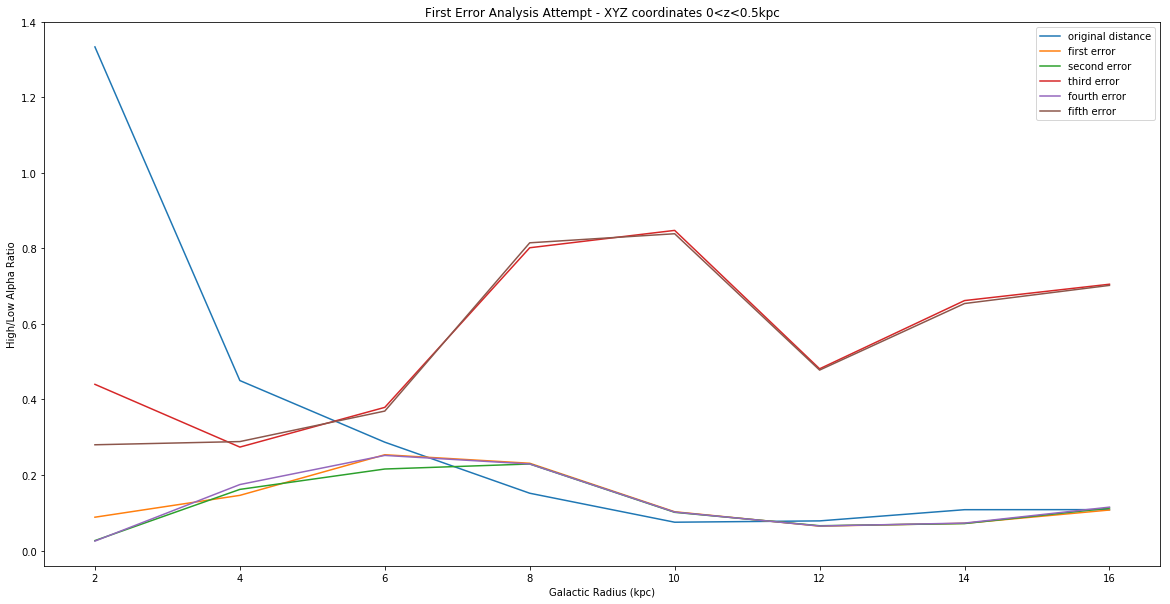

In [169]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
plt.title('First Error Analysis Attempt - XYZ coordinates 0<z<0.5kpc')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('High/Low Alpha Ratio')
xyzoriga = plt.plot(r, original_xyzratioa, label='original distance')
xyztry1a = plt.plot(r, try1_xyzratioa, label='first error')
xyztry2a = plt.plot(r, try2_xyzratioa, label='second error')
xyztry3a = plt.plot(r, try3_xyzratioa, label='third error')
xyztry4a = plt.plot(r, try4_xyzratioa, label='fourth error')
xyztry5a = plt.plot(r, try5_xyzratioa, label='fifth error')
plt.legend()
plt.show()

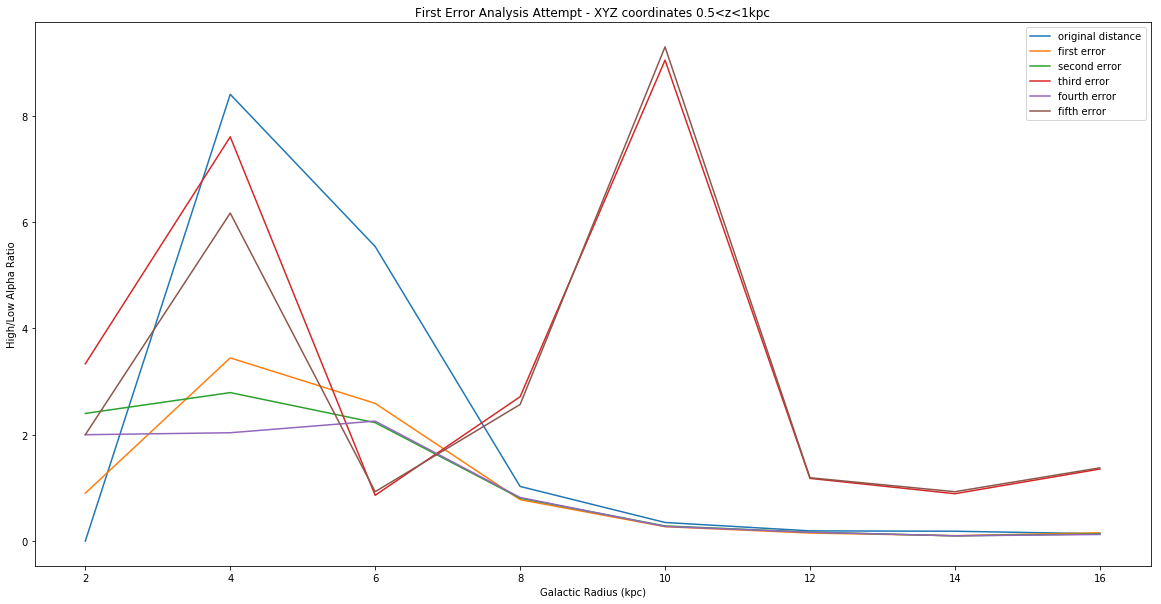

In [178]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
plt.title('First Error Analysis Attempt - XYZ coordinates 0.5<z<1kpc')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('High/Low Alpha Ratio')
xyzorigb = plt.plot(r, original_xyzratiob, label='original distance')
xyztry1b = plt.plot(r, try1_xyzratiob, label='first error')
xyztry2b = plt.plot(r, try2_xyzratiob, label='second error')
xyztry3b = plt.plot(r, try3_xyzratiob, label='third error')
xyztry4b = plt.plot(r, try4_xyzratiob, label='fourth error')
xyztry5b = plt.plot(r, try5_xyzratiob, label='fifth error')
plt.legend()
plt.show()

In [164]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
plt.title('First Error Analysis Attempt - XYZ coordinates 1<z<2kpc')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('High/Low Alpha Ratio')
xyzorigc = plt.plot(r, original_xyzratioc, label='original distance')
xyztry1c = plt.plot(r, try1_xyzratioc, label='first error')
xyztry2c = plt.plot(r, try2_xyzratioc, label='second error')
xyztry3c = plt.plot(r, try3_xyzratioc, label='third error')
xyztry4c = plt.plot(r, try4_xyzratioc, label='fourth error')
xyztry5c = plt.plot(r, try5_xyzratioc, label='fifth error')
plt.legend()
plt.savefig('ErrorAnalysisAttempt1XYZc.png')

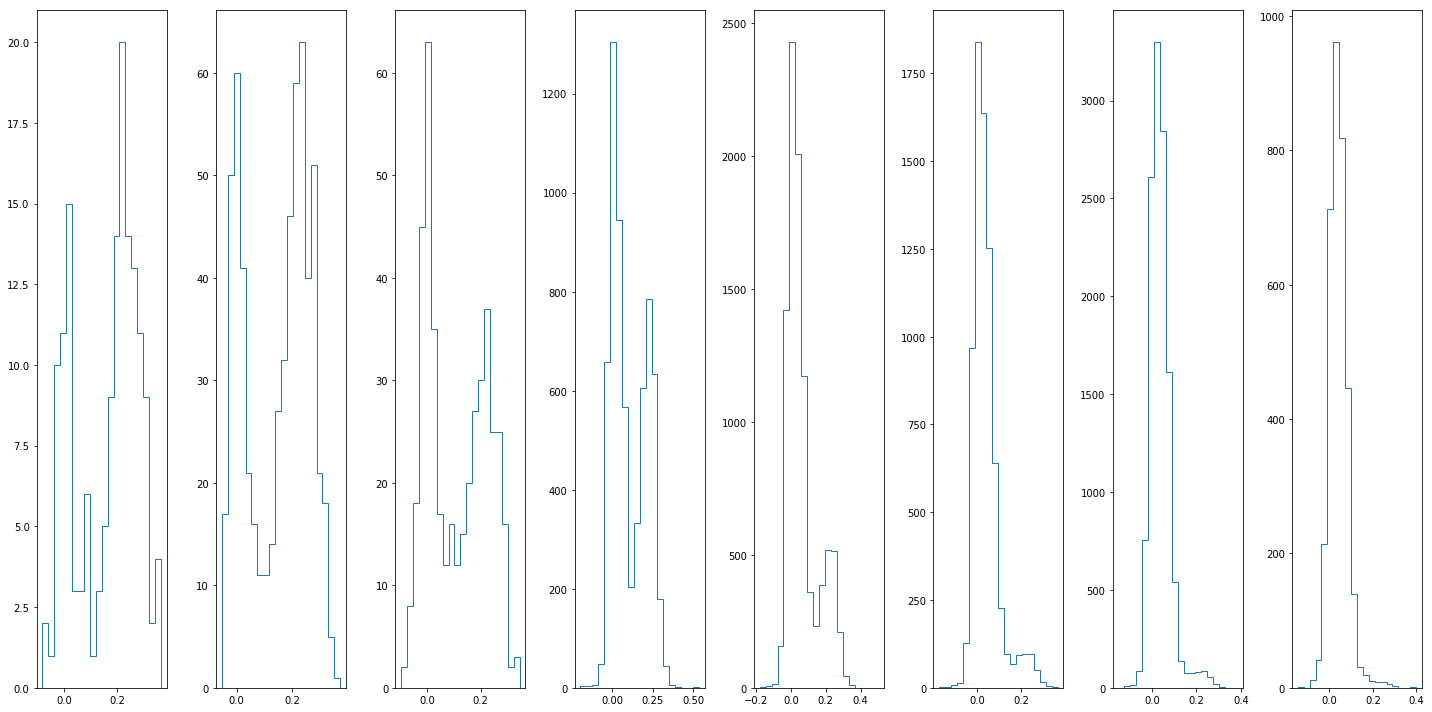

In [114]:
fig1 = plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,8,1)
T1AM1 = ax1.hist(T1A1, bins=20, histtype='step')
ax2 = plt.subplot(1,8,2)
T1AM2 = ax2.hist(T1A2, bins=20, histtype='step')
ax3 = plt.subplot(1,8,3)
T1AM3 = ax3.hist(T1A3, bins=20, histtype='step')
ax4 = plt.subplot(1,8,4)
T1AM4 = ax4.hist(T1A4, bins=20, histtype='step')
ax5 = plt.subplot(1,8,5)
T1AM5 = ax5.hist(T1A5, bins=20, histtype='step')
ax6 = plt.subplot(1,8,6)
T1AM6 = ax6.hist(T1A6, bins=20, histtype='step')
ax7 = plt.subplot(1,8,7)
T1AM7 = ax7.hist(T1A7, bins=20, histtype='step')
ax8 = plt.subplot(1,8,8)
T1AM8 = ax8.hist(T1A8, bins=20, histtype='step')
plt.tight_layout()
plt.show(fig1)

In [168]:
try1 = t2['new1']
alpha = t2['ALPHA']

cut1 = np.logical_and(try1 > 0., try1 < 2000.)
cut2 = np.logical_and(try1 > 2000., try1 < 4000.)
cut3 = np.logical_and(try1 > 4000., try1 < 6000.)
cut4 = np.logical_and(try1 > 6000., try1 < 8000.)
cut5 = np.logical_and(try1 > 8000., try1 < 10000.)
cut6 = np.logical_and(try1 > 10000., try1 < 12000.)
cut7 = np.logical_and(try1 > 12000., try1 < 14000.)
cut8 = np.logical_and(try1 > 14000., try1 < 16000.)

bin1 = try1[cut1]
a1 = alpha[cut1]
bin2 = try1[cut2]
a2 = alpha[cut2]
bin3 = try1[cut3]
a3 = alpha[cut3]
bin4 = try1[cut4]
a4 = alpha[cut4]
bin5 = try1[cut5]
a5 = alpha[cut5]
bin6 = try1[cut6]
a6 = alpha[cut6]
bin7 = try1[cut7]
a7 = alpha[cut7]
bin8 = try1[cut8]
a8 = alpha[cut8]

In [181]:
print(a3)

      ALPHA       
------------------
   0.0459397546947
   0.0338646769524
   0.0713188350201
  0.00861725211143
    0.021710768342
   0.0277025327086
 -0.00838678516448
  0.00276872515678
   0.0169045720249
  -0.0228313393891
               ...
-0.000279100611806
   0.0606153905392
  -0.0143341552466
   0.0216840002686
    0.199237510562
  -0.0363934002817
  -0.0167876519263
   0.0157832484692
   0.0130435097963
   0.0659521743655
   0.0394252613187
Length = 43028 rows


In [158]:
new_ratio_vals = []
def find_new_ratio():
    for alpha in a1:
        HIGH = np.logical_and(alpha >= np.mean(yval), alpha < 9999)
        LOW = np.logical_and(alpha <= np.mean(yval), alpha > -9999)
        high_alpha = alpha[HIGH]
        low_alpha = alpha[LOW]
        num = np.float(len(high_alpha))
        denom = np.float(len(low_alpha))
        ratio = num/denom
        new_ratio_vals.append(ratio)

In [160]:
find_new_ratio()
print(ratio)

NameError: name 'ratio' is not defined

In [ ]:

rows = len(DIST1)
new_radius_bin = []
def create_new_radius():
    for each in zip(DIST1, DLO1, DHI1):
        a = (DLO1 - DIST1) / STD1
        b = (DHI1 - DIST1) / STD1
        
            
        for i in range(rows):
            for j in range(0,5):
                for myclipa, myclipb, each in zip(a, b, DIST1):    
                    X = stats.truncnorm(myclipa, myclipb, loc=each, scale=STD1)
                    nval = 1000
                    new_radius = X.rvs(nval)[random.randint(nval)]
                    
                    new_radius_bin.append(new_radius)
            
                if new_radius_bin[43027] != 0.0:
                    print(new_radius_bin[43027])
                    break
            

In [ ]:
x = np.linspace(a, b, 25)
y = np.array(t[1])
y.shape

In [ ]:
x = np.linspace(a, b, 1000)